

## Data Analysis Topic: Comparative Analysis of Industry Financial Health of Europe in  Year 2022 

**Datasets Used:**
1. Employee Statistics by Industry
2. EVA and Equity EVA by Industry
3. Market Capitalization by Industry
4. Tax Rate by Industry
5. Cost of Capital by Industry
6. Operating Lease by Industry
7. Total Beta by Industry Sector
8. Dollar Value Measures by Industry

**Dataset link:** https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datacurrent.html


**Analytical Questions** 
1. How does the financial health of different industries compare when considering metrics such as Economic Value Added (EVA), market capitalization, revenues, and profitability within a given year?
2. How does the tax efficiency of industries impact their overall performance, and what correlations exist between tax rates, financial metrics, and profitability in that specific year?
3. What insights can be gained by comparing the cost of capital and risk factors (beta, cost of debt) across different industries, and how do these factors influence financial performance and market dynamics in the given year?
4. How do differences in operational aspects, such as operating leases and debt structures, affect operational income, Return on Invested Capital (ROIC), and pre-tax margins among various industries?
5. In comparing dollar value metrics like market capitalization, book equity, enterprise value, and revenues across industries, what strengths and weaknesses unique to each industry emerge?

In [72]:
#imporitng libraries
import pandas as pd 
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [73]:
#loading data as pandas df 

EVAEurope = pd.read_csv('EVAEurope.csv')
EmployeeEurope = pd.read_csv('EmployeeEurope.csv')
MktCapEurope = pd.read_csv('MktCapEurope.csv')
DollarEurope = pd.read_csv('DollarEurope.csv')
taxrateEurope = pd.read_csv('taxrateEurope.csv')
CostOfCapitalEurope = pd.read_csv('CostOfCapitalEurope.csv')
OperatingLease = pd.read_csv('OperatingLeaseAdjustedValuesForDebtReturnsAndEarnings.csv')
totalbetaEurope = pd.read_csv('totalbetaEurope.csv')

In [74]:
dfNames = ['EmployeeEurope','EVAEurope','MktCapEurope','DollarEurope','taxrateEurope','CostOfCapitalEurope','OperatingLease', 'totalbetaEurope']

In [75]:
import pandas as pd

# Load data from new CSV files
EVAEurope = pd.read_csv('EVAEurope.csv')
EmployeeEurope = pd.read_csv('EmployeeEurope.csv')
MktCapEurope = pd.read_csv('MktCapEurope.csv')
DollarEurope = pd.read_csv('DollarEurope.csv')
taxrateEurope = pd.read_csv('taxrateEurope.csv')
CostOfCapitalEurope = pd.read_csv('CostOfCapitalEurope.csv')
OperatingLease = pd.read_csv('OperatingLeaseAdjustedValuesForDebtReturnsAndEarnings.csv')
totalbetaEurope = pd.read_csv('totalbetaEurope.csv')

# Renaming columns for consistency
taxrateEurope.rename(columns={'Industry name': 'Industry Name'}, inplace=True)
DollarEurope.rename(columns={'Industry  Name': 'Industry Name'}, inplace=True)

# Removing unnecessary columns
EmployeeEurope.drop(columns=['Number of firms'], inplace=True)
MktCapEurope.drop(columns=['Number of firms'], inplace=True)
DollarEurope.drop(columns=['Number of firms'], inplace=True)
taxrateEurope.drop(columns=['Number of firms'], inplace=True)
CostOfCapitalEurope.drop(columns=['Number of Firms'], inplace=True)
OperatingLease.drop(columns=['Number of firms'], inplace=True)
totalbetaEurope.drop(columns=['Number of firms'], inplace=True)

# Merging dataframes based on 'Industry Name'
merged_data = pd.merge(EmployeeEurope, EVAEurope, on='Industry Name')
merged_data = pd.merge(merged_data, MktCapEurope, on='Industry Name')
merged_data = pd.merge(merged_data, taxrateEurope, on='Industry Name')
merged_data = pd.merge(merged_data, CostOfCapitalEurope, on='Industry Name')
merged_data = pd.merge(merged_data, OperatingLease, on='Industry Name')
merged_data = pd.merge(merged_data, totalbetaEurope, on='Industry Name')
merged_data = pd.merge(merged_data, DollarEurope, on='Industry Name')

# Duplicate Columns to remove from the merged dataset
columns_to_remove = [
    'Revenues ($ millions)_x', 'Beta_x', 'Cost of Equity_x', 'Cost of Capital_x', 
    'Std Dev in Stock_x', 'E/(D+E)_x', 'Cost of Debt_x', 'Tax Rate_x', 'Beta_y', 
    'Cost of Equity_y', 'E/(D+E)_y', 'Std Dev in Stock_y', 'Cost of Debt_y', 
    'Tax Rate_y', 'After-tax Cost of Debt_y', 'D/(D+E)_y', 'Cost of Capital_y', 
    'Revenues ($ millions)_y', 'After-tax Cost of Debt_x', 'D/(D+E)_x'
]

# Removing unnecessary columns from the merged dataset
merged_data.drop(columns=columns_to_remove, inplace=True)


In [76]:
def clean_and_convert_to_float(value):
    # Remove special characters and convert to float
    try:
        if '%' in value:
            cleaned_value = float(value.replace('%', '')) / 100.0
        else:
            cleaned_value = float(value.replace('$', '').replace('₹', '').replace(',', '').replace(')', '').replace('(', ''))
        return cleaned_value
    except ValueError:
         #print(value)
        return float('NaN')  # Handle non-convertible values as NaN

# Columns to convert to float (excluding 'Industry Name')
columns_to_convert = [col for col in merged_data.columns if col != 'Industry Name']

# Convert columns to float after cleaning
for col in columns_to_convert:
    merged_data[col] = merged_data[col].apply(lambda x: clean_and_convert_to_float(x) if isinstance(x, str) else x).astype(float)


In [77]:
merged_data.columns

Index(['Industry Name', 'Number of Employees',
       'Market Capitalization ( ($ millions)', 'Mkt Cap per Employee ($)',
       'Revenues per Employee  ($)', 'Stock-based Compensation ($ millions)',
       'Stock-based Compensation as % of Revenue', 'Number of Firms', 'ROE',
       '(ROE - COE)', 'BV of Equity', 'Equity EVA', 'ROC', '(ROC - WACC)',
       'BV of Capital', 'EVA', '12/31/19', '3/20/20', '11/20/20', '12/31/21',
       '12/31/22', '12/31/19-3/20/20', '3/20/20-11/1/20', '11/1/20 - 12/31/21',
       '2022', '12/31/19-12/31/22', 'Total Taxable Income',
       'Total Taxes Paid (Accrual)', 'Total Cash Taxes Paid',
       'Cash Taxes/Accrual Taxes', 'Average across all companies',
       'Average across only money-making companies', 'Aggregate tax rate',
       'Average across only money-making companies.1', 'Aggregate tax rate.1',
       'Cost of Capital (Euros)', 'Lease Expense/ Sales',
       'Total Debt without leases', 'Total Debt with Leases',
       'Lease Debt as % of 

In [78]:
#checking for null values 
merged_data.isna().sum()

Industry Name                                    0
Number of Employees                              0
Market Capitalization ( ($ millions)             0
Mkt Cap per Employee ($)                         0
Revenues per Employee  ($)                       0
Stock-based Compensation ($ millions)            0
Stock-based Compensation as % of Revenue         0
Number of Firms                                  0
ROE                                              0
(ROE - COE)                                      0
BV of Equity                                     0
Equity EVA                                       0
ROC                                              0
(ROC - WACC)                                     0
BV of Capital                                    0
EVA                                              0
12/31/19                                         0
3/20/20                                          0
11/20/20                                         0
12/31/21                       

In [79]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Industry Name                                 96 non-null     object 
 1   Number of Employees                           96 non-null     float64
 2   Market Capitalization ( ($ millions)          96 non-null     float64
 3   Mkt Cap per Employee ($)                      96 non-null     float64
 4   Revenues per Employee  ($)                    96 non-null     float64
 5   Stock-based Compensation ($ millions)         96 non-null     float64
 6   Stock-based Compensation as % of Revenue      96 non-null     float64
 7   Number of Firms                               96 non-null     float64
 8   ROE                                           96 non-null     float64
 9   (ROE - COE)                                   96 non-null     float

In [80]:
#Filling NaN values with mean 

# Filter numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64'])

# Fill NaN values with the mean for each numeric column
filled_numeric_columns = numeric_columns.apply(lambda col: col.fillna(col.mean()))

# Include the 'Industry Name' column
industry_column = merged_data[['Industry Name']]

# Merge the filled numeric columns and the 'Industry Name' column
merged_data_filled = pd.concat([industry_column, filled_numeric_columns], axis=1)

# Display the filled DataFrame
# print(merged_data_filled)
merged_data = merged_data_filled.copy()

In [81]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Industry Name                                 96 non-null     object 
 1   Number of Employees                           96 non-null     float64
 2   Market Capitalization ( ($ millions)          96 non-null     float64
 3   Mkt Cap per Employee ($)                      96 non-null     float64
 4   Revenues per Employee  ($)                    96 non-null     float64
 5   Stock-based Compensation ($ millions)         96 non-null     float64
 6   Stock-based Compensation as % of Revenue      96 non-null     float64
 7   Number of Firms                               96 non-null     float64
 8   ROE                                           96 non-null     float64
 9   (ROE - COE)                                   96 non-null     float

66


<ipython-input-82-a4de23430076>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


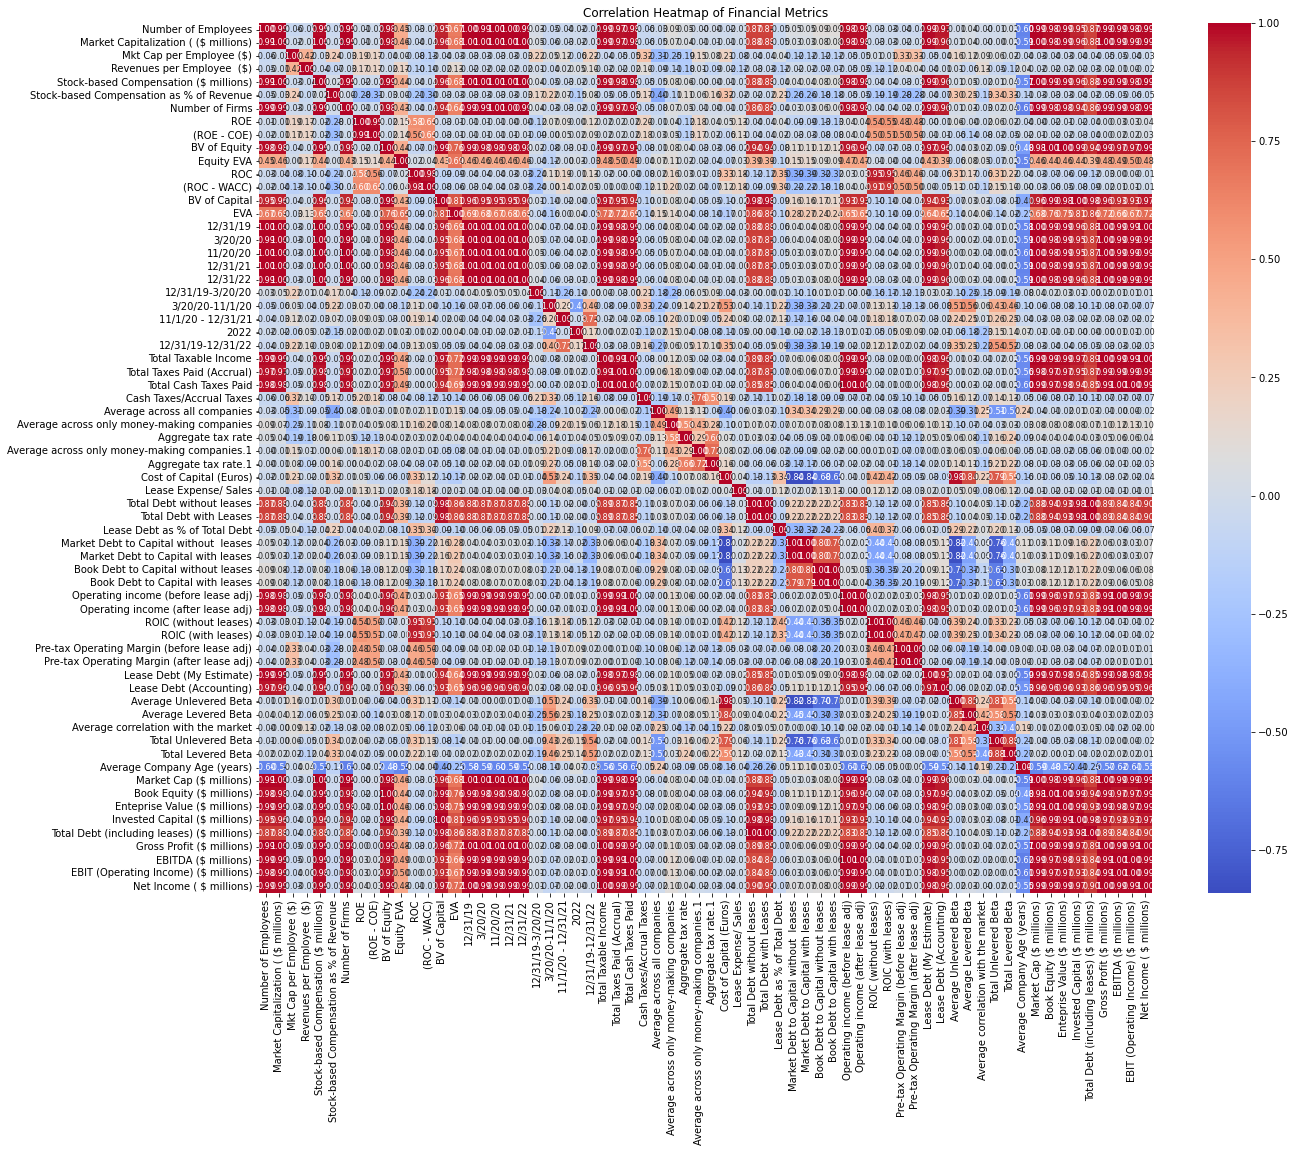

In [82]:
#visualizing corelation heatmap between all available features
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlation_matrix = merged_data.corr()

# Get the number of columns
num_columns = correlation_matrix.shape[1]

print(num_columns)

# Plotting correlation heatmap
plt.figure(figsize=(20, 16))  # Adjust the size of the heatmap further
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Heatmap of Financial Metrics')

# Rotate x-axis tick labels for better readability
for item in heatmap.get_xticklabels():
    item.set_rotation(90)
    
# reference : https://www.geeksforgeeks.org/plotting-correlation-matrix-using-python/

plt.show()

<ipython-input-83-74b83d76914e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


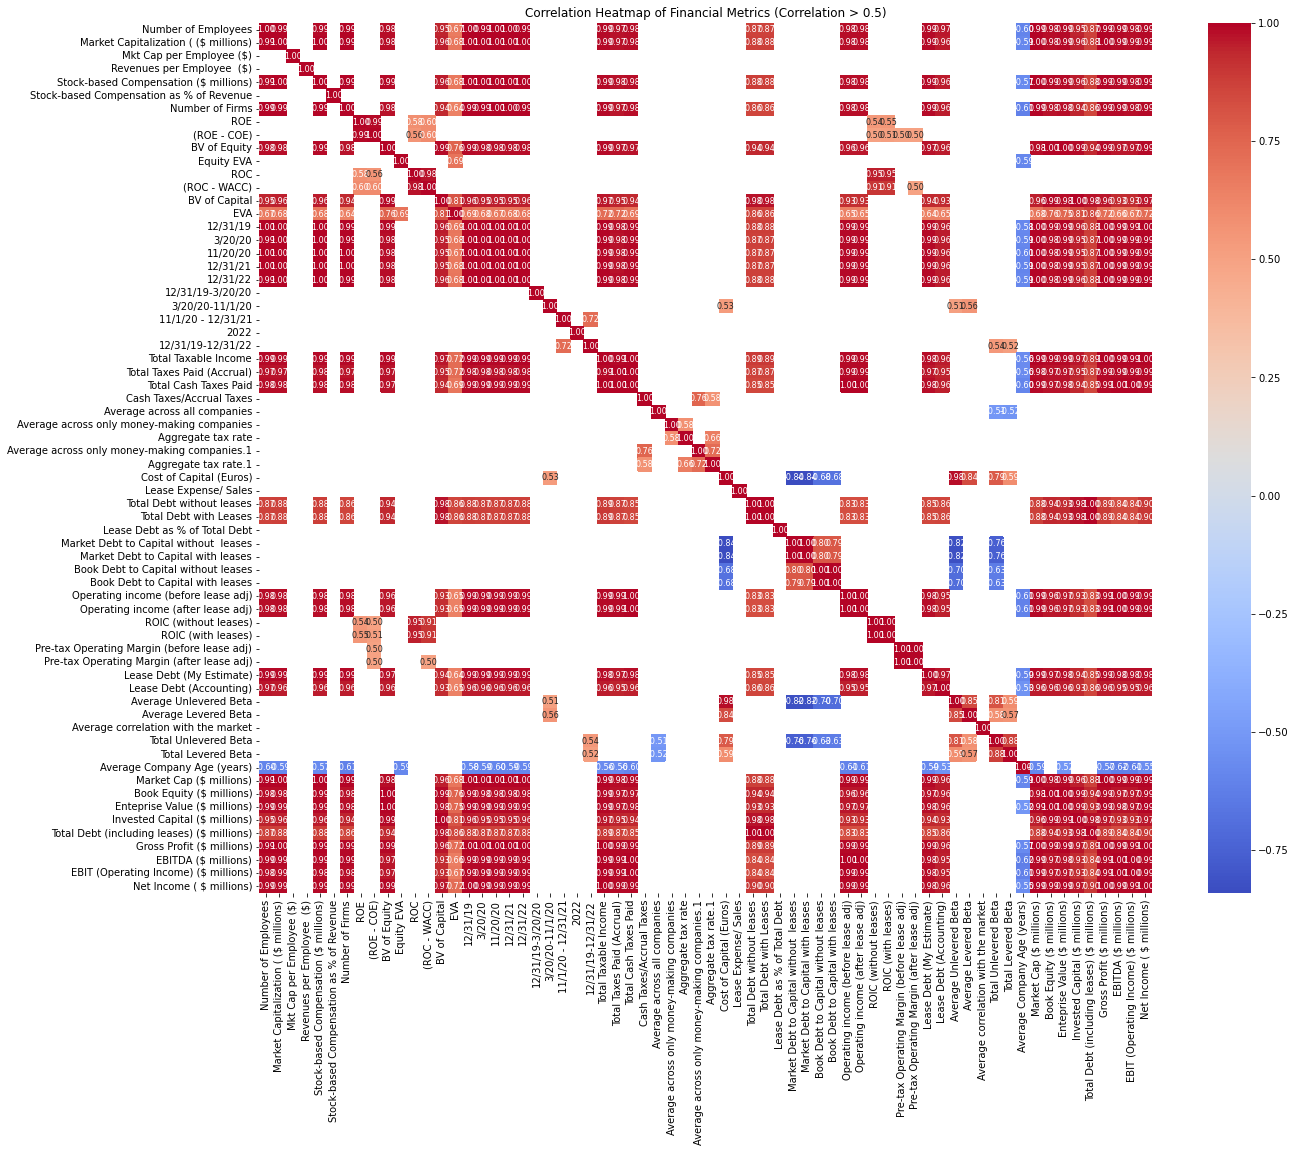

In [83]:
#visualizing only highly corelated values in the correlation heatmap
# Calculate correlations
correlation_matrix = merged_data.corr()

# Filter the correlation matrix based on the condition (greater than 0.5)
filtered_corr_matrix = correlation_matrix[correlation_matrix.abs() > 0.5]

# Plotting correlation heatmap for filtered matrix
plt.figure(figsize=(20, 16))  
heatmap = sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Heatmap of Financial Metrics (Correlation > 0.5)')

# Rotate x-axis tick labels for better readability
for item in heatmap.get_xticklabels():
    item.set_rotation(90)

plt.show()

In [84]:
# Displaying correlation values greater than 0.75
# Calculate correlations
correlation_matrix = merged_data.corr()

# Filter the correlation matrix based on the condition (greater than 0.75)
high_corr_values = correlation_matrix[correlation_matrix.abs() > 0.75]

# Display correlation values greater than 0.75
print("Correlation values greater than 0.75:")
print(high_corr_values)

Correlation values greater than 0.75:
                                              Number of Employees  \
Number of Employees                                      1.000000   
Market Capitalization ( ($ millions)                     0.994841   
Mkt Cap per Employee ($)                                      NaN   
Revenues per Employee  ($)                                    NaN   
Stock-based Compensation ($ millions)                    0.992460   
Stock-based Compensation as % of Revenue                      NaN   
Number of Firms                                          0.994725   
ROE                                                           NaN   
(ROE - COE)                                                   NaN   
BV of Equity                                             0.979352   
Equity EVA                                                    NaN   
ROC                                                           NaN   
(ROC - WACC)                                                  NaN

<ipython-input-84-e760336ebe8d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


In [85]:
# Calculate correlations
correlation_matrix = merged_data.corr()

# Filter the correlation matrix based on the condition (greater than 0.5)
high_corr_values = correlation_matrix[correlation_matrix.abs() > 0.5]

# Display correlation values greater than 0.5 along with column names
print("Correlation values greater than 0.5:")
for column in high_corr_values.columns:
    correlated_cols = high_corr_values[column].dropna()
    for idx, value in correlated_cols.items():
        if value > 0.5 and idx != column:  # Exclude self-correlations and print only values greater than 0.5
            print(f"Column '{column}' has a correlation of {value:.2f} with column '{idx}'")

Correlation values greater than 0.5:
Column 'Number of Employees' has a correlation of 0.99 with column 'Market Capitalization ( ($ millions)'
Column 'Number of Employees' has a correlation of 0.99 with column 'Stock-based Compensation ($ millions)'
Column 'Number of Employees' has a correlation of 0.99 with column 'Number of Firms'
Column 'Number of Employees' has a correlation of 0.98 with column 'BV of Equity'
Column 'Number of Employees' has a correlation of 0.95 with column 'BV of Capital'
Column 'Number of Employees' has a correlation of 0.67 with column 'EVA'
Column 'Number of Employees' has a correlation of 1.00 with column '12/31/19'
Column 'Number of Employees' has a correlation of 0.99 with column '3/20/20'
Column 'Number of Employees' has a correlation of 1.00 with column '11/20/20'
Column 'Number of Employees' has a correlation of 1.00 with column '12/31/21'
Column 'Number of Employees' has a correlation of 0.99 with column '12/31/22'
Column 'Number of Employees' has a cor

<ipython-input-85-de6321ae897a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


Now we will perform analysis to answer our Analytical questions -

### 1. Industry Financial Health Comparison:

How does the financial health of various industries compare and evaluate when analyzing metrics like Economic Value Added (EVA), market capitalization, revenues, and profitability for the specified year?

#### Market Cap:
Taking a look at Market Cap.

In [86]:
sorted_data = merged_data.sort_values(by='Market Capitalization ( ($ millions)', ascending=False)[['Industry Name', 'Market Capitalization ( ($ millions)']]
print("Market Capitalization for Industries in Europe: ")
print()
print(sorted_data.to_string(index=False))

Market Capitalization for Industries in Europe: 

                         Industry Name  Market Capitalization ( ($ millions)
                          Total Market                             8681493.0
     Total Market (without financials)                             7466850.0
                Drugs (Pharmaceutical)                              686724.0
                   Bank (Money Center)                              650728.0
                  Chemical (Specialty)                              462024.0
                                 Power                              427368.0
                  Beverage (Alcoholic)                              363297.0
                   Healthcare Products                              313815.0
                               Apparel                              303081.0
                             Machinery                              276477.0
                     Computer Services                              272816.0
                          

In [87]:
# Top 10 industries by Market Cap
sorted_data = merged_data.sort_values(by='Market Capitalization ( ($ millions)', ascending=False)
top_12 = sorted_data.head(12)[['Industry Name', 'Market Capitalization ( ($ millions)']]
top_10_excluding_top_2 = top_12.iloc[2:].reset_index(drop=True)
print("Top 10 Industries as per Market Capitalization :")
print("")
print(top_10_excluding_top_2.to_string(index=False))

Top 10 Industries as per Market Capitalization :

         Industry Name  Market Capitalization ( ($ millions)
Drugs (Pharmaceutical)                              686724.0
   Bank (Money Center)                              650728.0
  Chemical (Specialty)                              462024.0
                 Power                              427368.0
  Beverage (Alcoholic)                              363297.0
   Healthcare Products                              313815.0
               Apparel                              303081.0
             Machinery                              276477.0
     Computer Services                              272816.0
           Diversified                              256190.0


In [88]:
# Bottom 10 industries by Market Cap
bottom_10 = sorted_data.tail(10)[['Industry Name', 'Market Capitalization ( ($ millions)']]
print("Bottom 10 Industries as per Market Capitalization")
print("")
print(bottom_10.to_string(index=False))

Bottom 10 Industries as per Market Capitalization

                  Industry Name  Market Capitalization ( ($ millions)
           Oil/Gas Distribution                                5307.0
            Software (Internet)                                4215.0
                       Trucking                                3982.0
Electronics (Consumer & Office)                                3223.0
          Coal & Related Energy                                2585.0
               Food Wholesalers                                1675.0
                      Education                                1613.0
          Computers/Peripherals                                1403.0
    Office Equipment & Services                                1054.0
     Transportation (Railroads)                                 346.0


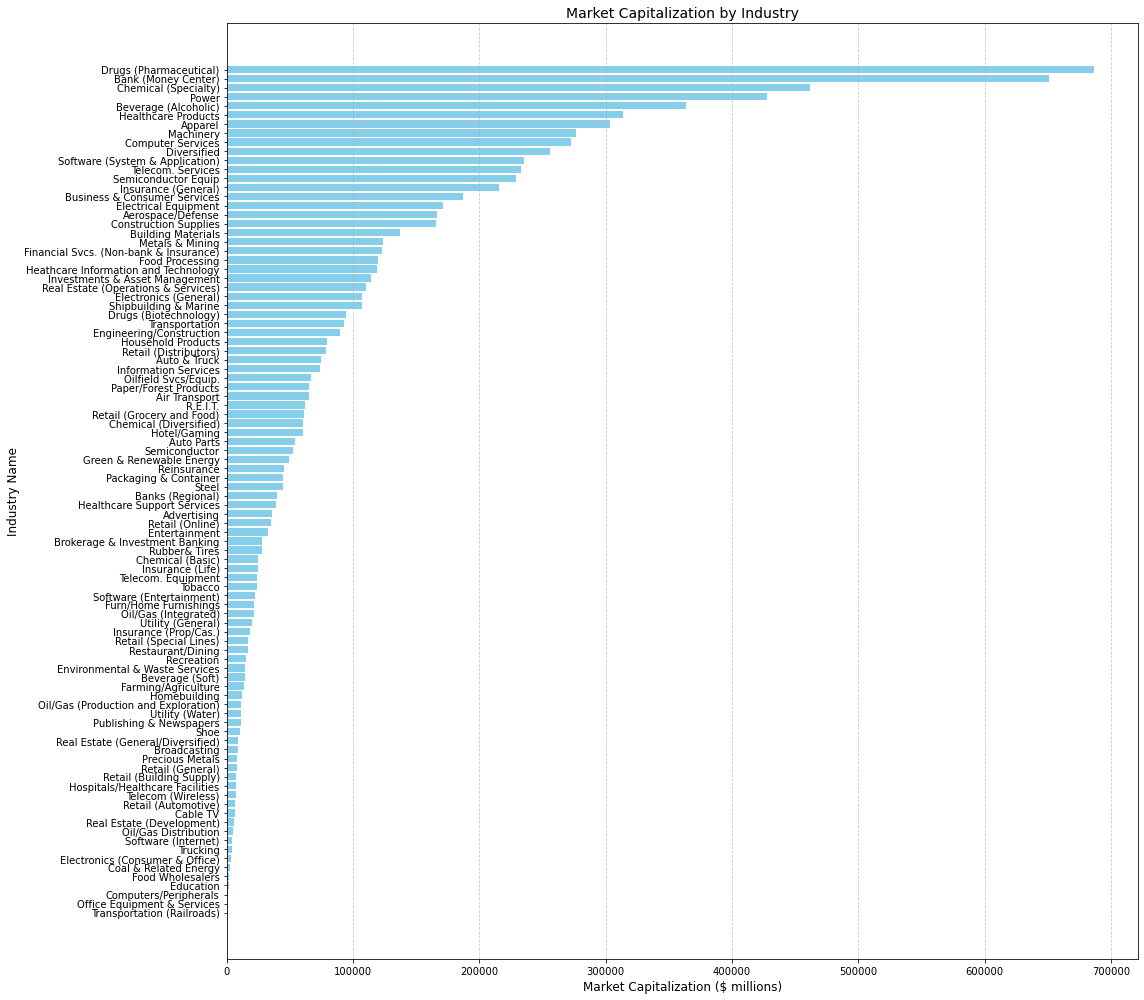

In [89]:
# Visualizing Market Capitalization by Industry
# Sorting the data by Market Capitalization
sorted_data = merged_data.sort_values(by='Market Capitalization ( ($ millions)', ascending=False)

# Excluding the top 2 rows as those values are of no need to us in the current visualization 
sorted_data_excluded = sorted_data.iloc[2:]

# Extracting Industry Name and Market Capitalization for visualization
industry_names = sorted_data_excluded['Industry Name']
market_cap = sorted_data_excluded['Market Capitalization ( ($ millions)']

# Plotting the bar graph
plt.figure(figsize=(16, 14))
bars = plt.barh(industry_names, market_cap, color='skyblue')

# Customize appearance
plt.xlabel('Market Capitalization ($ millions)', fontsize=12)
plt.ylabel('Industry Name', fontsize=12)
plt.title('Market Capitalization by Industry', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest at the top

plt.tight_layout()
plt.show()

### Gross Profit:
Now we will take a look at Gross Profit for all Industries 

In [90]:
#printing gross profit for industries after sorting

sorted_data = merged_data.sort_values(by='Gross Profit ($ millions)', ascending=False)[['Industry Name', 'Gross Profit ($ millions)']]
print("Gross Profit for Industries in Year 2022:")
print()
print(sorted_data.to_string(index=False))

Gross Profit for Industries in Year 2022:

                         Industry Name  Gross Profit ($ millions)
                          Total Market                  4467751.0
     Total Market (without financials)                  3766429.0
                   Bank (Money Center)                   505582.0
                  Oil/Gas (Integrated)                   403736.0
                Drugs (Pharmaceutical)                   272334.0
                               Apparel                   185117.0
                                 Power                   158932.0
                     Telecom. Services                   146884.0
                   Insurance (General)                   125426.0
              Engineering/Construction                   121019.0
                       Food Processing                   112244.0
                          Auto & Truck                   110578.0
                       Metals & Mining                   101021.0
                 Construction Sup

In [91]:
# Top 10 industries by Gross Profit
sorted_data = merged_data.sort_values(by='Gross Profit ($ millions)', ascending=False)
top_12 = sorted_data.head(12)[['Industry Name', 'Gross Profit ($ millions)']]
top_10_excluding_top_2 = top_12.iloc[2:].reset_index(drop=True)
print("Top 10 Industries as per Gross Profit:")
print()
print(top_10_excluding_top_2.to_string(index=False))

Top 10 Industries as per Gross Profit:

           Industry Name  Gross Profit ($ millions)
     Bank (Money Center)                   505582.0
    Oil/Gas (Integrated)                   403736.0
  Drugs (Pharmaceutical)                   272334.0
                 Apparel                   185117.0
                   Power                   158932.0
       Telecom. Services                   146884.0
     Insurance (General)                   125426.0
Engineering/Construction                   121019.0
         Food Processing                   112244.0
            Auto & Truck                   110578.0


In [92]:
# Bottom 10 industries by Gross Profit
bottom_10 = sorted_data.tail(10)[['Industry Name', 'Gross Profit ($ millions)']]
print("Bottom 10 Industries as per Gross Profit:")
print()
print(bottom_10.to_string(index=False))

Bottom 10 Industries as per Gross Profit:

                    Industry Name  Gross Profit ($ millions)
         Software (Entertainment)                     4218.0
        Real Estate (Development)                     4156.0
                  Utility (Water)                     3540.0
                         Cable TV                     2958.0
      Office Equipment & Services                     2635.0
Real Estate (General/Diversified)                     1771.0
              Software (Internet)                     1001.0
       Transportation (Railroads)                      839.0
                        Education                      705.0
            Coal & Related Energy                      323.0


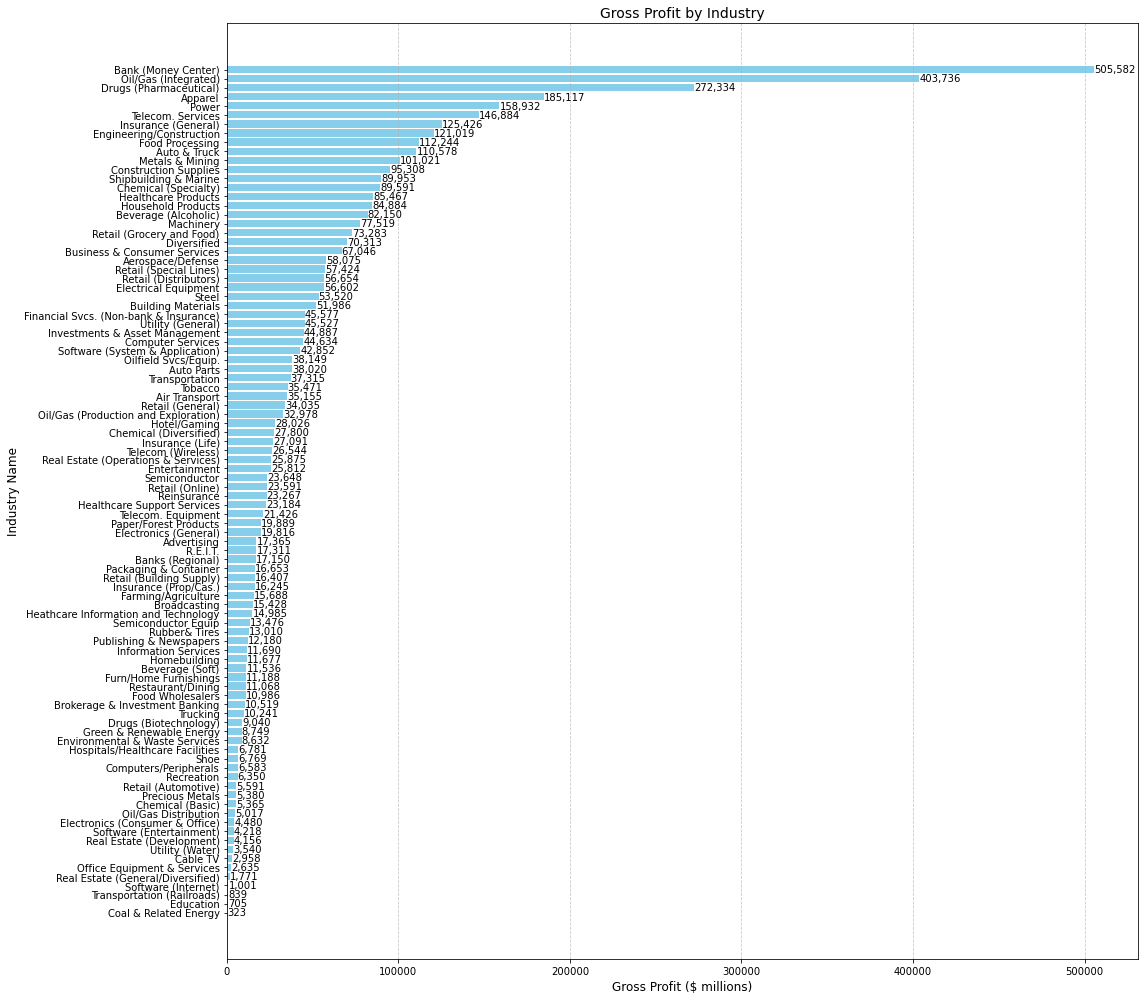

In [93]:
# visualizing Gross Profit by Industry

import matplotlib.pyplot as plt

# Sorting the data by Gross Profit
sorted_data = merged_data.sort_values(by='Gross Profit ($ millions)', ascending=False)

# Excluding the top 2 rows
sorted_data_excluded = sorted_data.iloc[2:]

# Extracting Industry Name and Gross Profit for visualization
industry_names = sorted_data_excluded['Industry Name']
gross_profit = sorted_data_excluded['Gross Profit ($ millions)']

# Plotting the bar graph
plt.figure(figsize=(16, 14))
bars = plt.barh(industry_names, gross_profit, color='skyblue')

# Customize appearance
plt.xlabel('Gross Profit ($ millions)', fontsize=12)
plt.ylabel('Industry Name', fontsize=12)
plt.title('Gross Profit by Industry', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest at the top

# Adding values to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():,.0f}', ha='left', va='center', 
             fontsize=10, color='black')

plt.tight_layout()
plt.show()

### EVA:
Taking a look at EVA for all Industries 

In [94]:
#printing EVA for industries after sorting

sorted_data = merged_data.sort_values(by='EVA', ascending=False)[['Industry Name', 'EVA']]
print("EVA for Industries in Year 2022:")
print()
print(sorted_data.to_string(index=False))

EVA for Industries in Year 2022:

                         Industry Name       EVA
                   Bank (Money Center) 303787.76
                          Total Market 273036.16
     Total Market (without financials) 165820.03
                                 Power 129821.34
                  Oil/Gas (Integrated) 103680.57
Financial Svcs. (Non-bank & Insurance)  67051.96
                 Shipbuilding & Marine  47807.24
                       Metals & Mining  44664.47
                               Apparel  37196.77
                Drugs (Pharmaceutical)  30297.23
                           Diversified  23301.06
   Real Estate (Operations & Services)  23098.67
  Oil/Gas (Production and Exploration)  16285.02
                       Retail (Online)  15996.96
                                 Steel  15098.37
                    Household Products  14440.27
                      Insurance (Life)  14165.27
                              R.E.I.T.  13929.71
                 Drugs (Biotechnolo

In [95]:
# Top 10 industries by EVA
sorted_data = merged_data.sort_values(by='EVA', ascending=False)
top_12 = sorted_data.head(12)[['Industry Name', 'EVA']]
top_10_excluding_top_2 = top_12.iloc[3:].reset_index(drop=True)
print("Top 10 Industries as per EVA:")
print()
print(top_10_excluding_top_2.to_string(index=False))

Top 10 Industries as per EVA:

                         Industry Name       EVA
                                 Power 129821.34
                  Oil/Gas (Integrated) 103680.57
Financial Svcs. (Non-bank & Insurance)  67051.96
                 Shipbuilding & Marine  47807.24
                       Metals & Mining  44664.47
                               Apparel  37196.77
                Drugs (Pharmaceutical)  30297.23
                           Diversified  23301.06
   Real Estate (Operations & Services)  23098.67


In [96]:
# Bottom 10 industries by EVA
bottom_10 = sorted_data.tail(10)[['Industry Name', 'EVA']]
print("Bottom 10 Industries as per EVA")
print(bottom_10.to_string(index=False))

Bottom 10 Industries as per EVA
                       Industry Name    EVA
                 Retail (Automotive) 150.77
                 Software (Internet) 136.66
                                Shoe 127.15
                     Utility (Water) 107.69
               Coal & Related Energy  69.78
                    Chemical (Basic)  62.63
                            Trucking  50.33
                          Recreation  41.42
Heathcare Information and Technology  12.98
                           Education   0.46


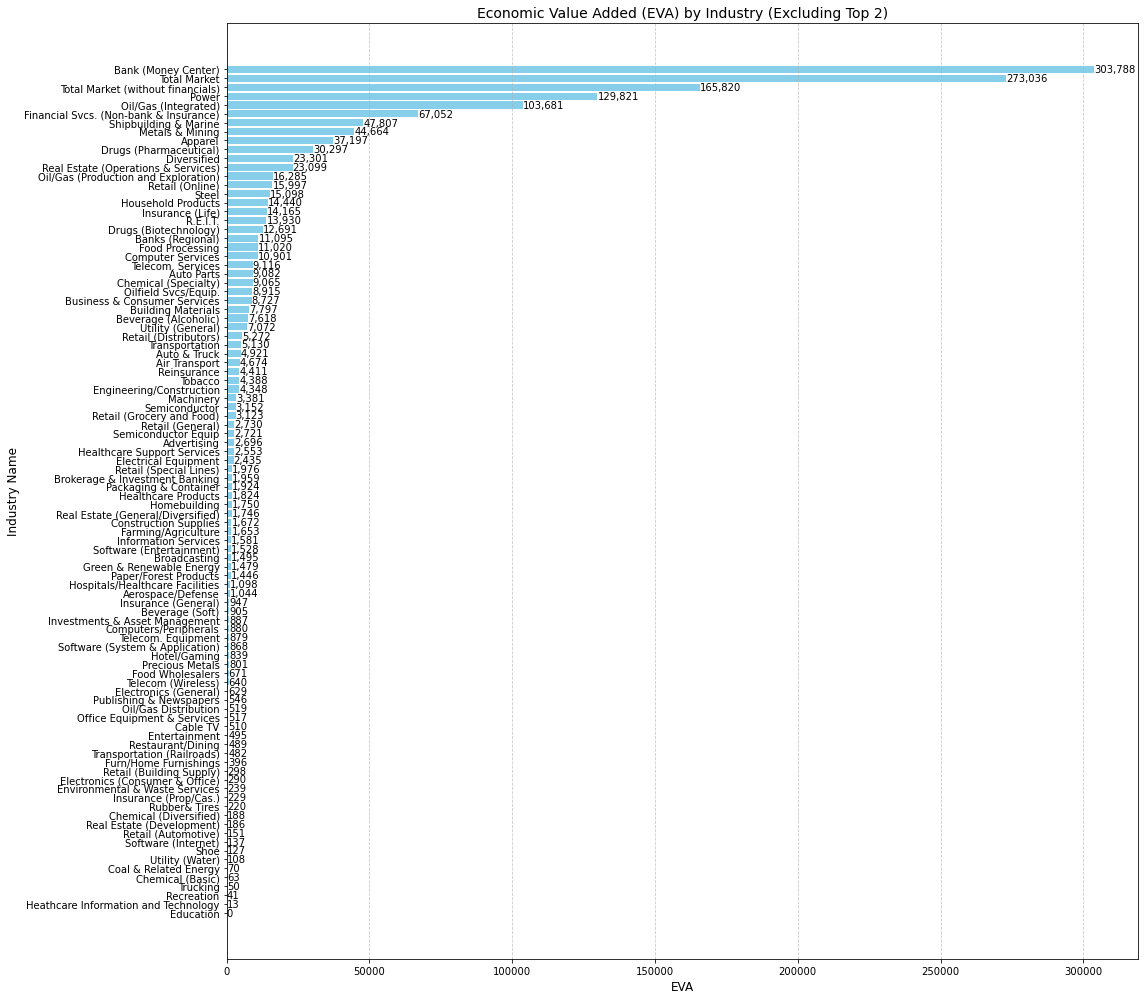

In [97]:
# Sorting the data by EVA
sorted_data = merged_data.sort_values(by='EVA', ascending=False)

# Excluding the top 2 rows
# sorted_data_excluded = sorted_data.iloc[3:]
sorted_data_excluded = sorted_data.iloc[:]

# Extracting Industry Name and EVA for visualization
industry_names = sorted_data_excluded['Industry Name']
eva = sorted_data_excluded['EVA']

# Plotting the bar graph
plt.figure(figsize=(16, 14))
bars = plt.barh(industry_names, eva, color='skyblue')

# Customize appearance
plt.xlabel('EVA', fontsize=12)
plt.ylabel('Industry Name', fontsize=12)
plt.title('Economic Value Added (EVA) by Industry (Excluding Top 2)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest at the top

# Adding values to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():,.0f}', ha='left', va='center', 
             fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Cross of Maket Cap, Gross Profit and EVA for all Industries:
Now we will try to make inferences based on our findings for Market Capitilization, Gross Profit and EVA and also take all of them into consiration to make inferences. 

In [98]:
#Filtering data based of the values of Market Capitalization, Gross Profit, and EVA
# Filter for high Market Capitalization, Gross Profit, and EVA
high_high_high = merged_data[
    (merged_data['Market Capitalization ( ($ millions)'] > merged_data['Market Capitalization ( ($ millions)'].quantile(0.75)) &
    (merged_data['Gross Profit ($ millions)'] > merged_data['Gross Profit ($ millions)'].quantile(0.75)) &
    (merged_data['EVA'] > merged_data['EVA'].quantile(0.75))
]

# Filter for low Market Capitalization, Gross Profit, and EVA
low_low_low = merged_data[
    (merged_data['Market Capitalization ( ($ millions)'] < merged_data['Market Capitalization ( ($ millions)'].quantile(0.25)) &
    (merged_data['Gross Profit ($ millions)'] < merged_data['Gross Profit ($ millions)'].quantile(0.25)) &
    (merged_data['EVA'] < merged_data['EVA'].quantile(0.25))
]

# Filter for high Market Capitalization, Gross Profit, and low EVA
high_high_low = merged_data[
    (merged_data['Market Capitalization ( ($ millions)'] > merged_data['Market Capitalization ( ($ millions)'].quantile(0.75)) &
    (merged_data['Gross Profit ($ millions)'] > merged_data['Gross Profit ($ millions)'].quantile(0.75)) &
    (merged_data['EVA'] < merged_data['EVA'].quantile(0.25))
]

# Filter for high Market Cap, low Gross Profit, low EVA
high_low_low = merged_data[
    (merged_data['Market Capitalization ( ($ millions)'] > merged_data['Market Capitalization ( ($ millions)'].quantile(0.75)) &
    (merged_data['Gross Profit ($ millions)'] < merged_data['Gross Profit ($ millions)'].quantile(0.25)) &
    (merged_data['EVA'] < merged_data['EVA'].quantile(0.25))
]

# Filter for low Market Cap, high Gross Profit, high EVA
low_high_high = merged_data[
    (merged_data['Market Capitalization ( ($ millions)'] < merged_data['Market Capitalization ( ($ millions)'].quantile(0.25)) &
    (merged_data['Gross Profit ($ millions)'] > merged_data['Gross Profit ($ millions)'].quantile(0.75)) &
    (merged_data['EVA'] > merged_data['EVA'].quantile(0.75))
]

# Filter for low Market Cap, low Gross Profit, high EVA
low_low_high = merged_data[
    (merged_data['Market Capitalization ( ($ millions)'] < merged_data['Market Capitalization ( ($ millions)'].quantile(0.25)) &
    (merged_data['Gross Profit ($ millions)'] < merged_data['Gross Profit ($ millions)'].quantile(0.25)) &
    (merged_data['EVA'] > merged_data['EVA'].quantile(0.75))
]

# Filter for high Market Cap, high Gross Profit, low EVA
high_high_low = merged_data[
    (merged_data['Market Capitalization ( ($ millions)'] > merged_data['Market Capitalization ( ($ millions)'].quantile(0.75)) &
    (merged_data['Gross Profit ($ millions)'] > merged_data['Gross Profit ($ millions)'].quantile(0.75)) &
    (merged_data['EVA'] < merged_data['EVA'].quantile(0.25))
]


In [99]:
conditions = [
    "High Market Cap, High Gross Profit, High EVA",
    "Low Market Cap, Low Gross Profit, Low EVA",
    "High Market Cap, Low Gross Profit, Low EVA",
    "Low Market Cap, High Gross Profit, High EVA",
    "Low Market Cap, Low Gross Profit, High EVA",
    "High Market Cap, High Gross Profit, Low EVA"
]

filtered_data = [
    high_high_high,
    low_low_low,
    high_low_low,
    low_high_high,
    low_low_high,
    high_high_low
]

for condition, data in zip(conditions, filtered_data):
    print(condition + ":")
    print(data[['Industry Name', 'Market Capitalization ( ($ millions)', 'Gross Profit ($ millions)', 'EVA']].to_string(index=False))
    print("\n")

High Market Cap, High Gross Profit, High EVA:
                    Industry Name  Market Capitalization ( ($ millions)  Gross Profit ($ millions)       EVA
                          Apparel                              303081.0                   185117.0  37196.77
              Bank (Money Center)                              650728.0                   505582.0 303787.76
                      Diversified                              256190.0                    70313.0  23301.06
           Drugs (Pharmaceutical)                              686724.0                   272334.0  30297.23
                  Food Processing                              120144.0                   112244.0  11020.39
                  Metals & Mining                              123333.0                   101021.0  44664.47
                            Power                              427368.0                   158932.0 129821.34
                Telecom. Services                              233215.0           

The data is divided into segments based on market capitalization, gross profit, and Economic Value Added (EVA) across various industries. 

**High Market Cap, High Gross Profit, High EVA:**
- Industries with substantial market capitalization, gross profit, and EVA:
  - Apparel, Bank (Money Center), Drugs (Pharmaceutical), Metals & Mining, Power are among those displaying high figures in these metrics.

**Low Market Cap, Low Gross Profit, Low EVA:**
- Industries with lower market capitalization, gross profit, and EVA:
  - Cable TV, Coal & Related Energy, Electronics (Consumer & Office), Real Estate (Development), Retail (Automotive), and others have notably lower figures in these areas.

**Other Categories:**
- The other combinations, such as high market cap with low gross profit and low EVA or low market cap with high gross profit and high EVA, don't seem to have any entries in the dataset provided.


#### Market Capitalization Analysis:
- **Leadership of Financial Sector:** *Bank (Money Center)* stands out with the highest market capitalization, indicating the dominance of the financial industry in the European market.
  
- **Pharmaceutical Strength:** *Drugs (Pharmaceutical)* holds a prominent position, showcasing substantial market confidence, likely due to consistent demand and innovation.

- **Tech and Energy Presence:** Industries like *Computer Services*, *Telecom. Services*, and *Power* feature significantly, indicating the relevance of technology and energy sectors in market valuation.

#### Gross Profit Insights:
- **Banking and Energy Domination:** *Bank (Money Center)* and *Oil/Gas (Integrated)* industries exhibit the highest gross profits, emphasizing their strong revenue-generating capabilities.

- **Diversification in Profitability:** Beyond finance and energy, sectors like *Apparel*, *Insurance (General)*, *Engineering/Construction*, and *Food Processing* also showcase substantial gross profits, highlighting diverse profitable segments.

#### Economic Value Added (EVA) Analysis:
- **Financial Sector's Wealth Creation:** *Bank (Money Center)* leads in EVA, demonstrating efficient wealth creation beyond the cost of capital, aligning with its high market capitalization and gross profit.

- **Energy and Real Estate Efficiency:** *Power*, *Oil/Gas (Integrated)*, and *Real Estate (Operations & Services)* industries also exhibit substantial EVA, indicating effective utilization of capital.

#### Correlations and Key Takeaways:
- **Financial Sector Influence:** The dominance of financial industries in market cap, gross profit, and EVA signifies their substantial impact on the European economy.

- **Diverse Profitable Sectors:** Beyond finance, sectors like *Pharmaceuticals*, *Technology (Computer Services, Telecom)*, *Energy (Power, Oil/Gas)*, and *Apparel* demonstrate strong financial performance across metrics.

- **Challenges in Specific Industries:** Sectors like *Software (Internet)*, *Trucking*, *Coal & Related Energy*, and *Chemical (Basic)* exhibit consistently lower financial metrics, indicating challenges in revenue generation and wealth creation.

#### Investment Implications:
- **Sectoral Diversification for Investment:** Industries demonstrating consistent strength across multiple metrics might offer diversified investment opportunities, while sectors with consistent underperformance might pose higher risks.


#### Key Takeaways:
1. **Banking Dominance:** Financial sectors, especially money center banks, maintain a dominant position in market capitalization, gross profit, and EVA.
2. **Sectoral Strengths:** Pharmaceuticals, specialty chemicals, and certain manufacturing sectors like apparel, power, and telecom services exhibit consistent financial strength.
3. **Technology Challenges:** While technology-related sectors hold promise, some segments like software (internet) and certain software applications face challenges in profitability and wealth creation.
4. **Struggling Industries:** Sectors such as coal and related energy, education, and trucking face difficulties in market capitalization, gross profits, and EVA, signaling potential hurdles in financial performance.

### 2.Tax Efficiency and Industry Performance:

What is the relationship between tax rates and industry performance, particularly examining how tax efficiency influences financial metrics and profitability during the specified period?

### Calculating Correlation:

In [100]:
# Selecting relevant columns related to tax rates and financial metrics
tax_related_cols = [
    'Industry Name', 'Total Taxable Income', 'Total Taxes Paid (Accrual)', 
    'Total Cash Taxes Paid', 'Cash Taxes/Accrual Taxes', 'Aggregate tax rate',
    'ROE', '(ROE - COE)', 'ROC', '(ROC - WACC)', 'EVA', 'ROIC (without leases)',
    'ROIC (with leases)', 'Pre-tax Operating Margin (before lease adj)',
    'Pre-tax Operating Margin (after lease adj)', 'Net Income ( $ millions)'
]

tax_and_financial_metrics = merged_data[tax_related_cols]

# Compute correlations
correlation_matrix = tax_and_financial_metrics.corr()

# Display correlation matrix
print(correlation_matrix)

                                             Total Taxable Income  \
Total Taxable Income                                     1.000000   
Total Taxes Paid (Accrual)                               0.992727   
Total Cash Taxes Paid                                    0.995294   
Cash Taxes/Accrual Taxes                                -0.080756   
Aggregate tax rate                                       0.052336   
ROE                                                      0.018837   
(ROE - COE)                                              0.015088   
ROC                                                     -0.015228   
(ROC - WACC)                                            -0.007816   
EVA                                                      0.720913   
ROIC (without leases)                                   -0.025167   
ROIC (with leases)                                      -0.024665   
Pre-tax Operating Margin (before lease adj)              0.001995   
Pre-tax Operating Margin (after le

<ipython-input-100-9c9f66df8499>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = tax_and_financial_metrics.corr()


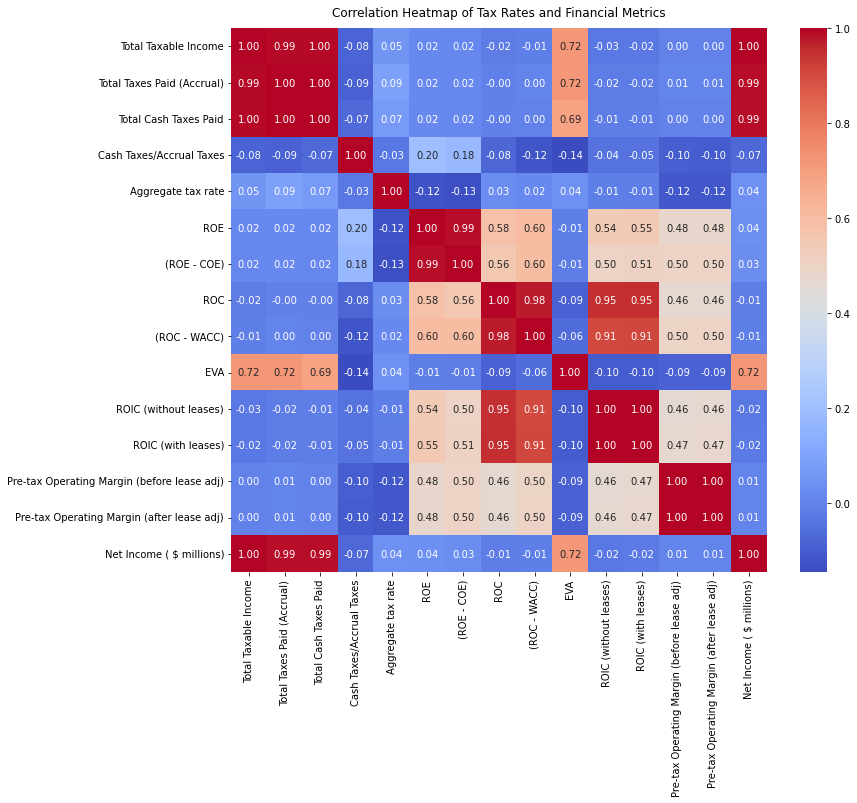

In [101]:
# Visualizing Correlation Heatmap of Tax Rates and selected Financial Metrics
# Set the size of the heatmap
plt.figure(figsize=(12, 10))
# Generate a heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# Set title
heatmap.set_title('Correlation Heatmap of Tax Rates and Financial Metrics', pad=12)
# Rotate y-axis labels for better readability
plt.yticks(rotation=0)
# Show the plot
plt.show()

Looking at the correlation matrix, several interesting insights can be drawn regarding the relationship between tax-related metrics and financial performance indicators:

### Strong Correlations:
- **Total Taxable Income, Total Taxes Paid (Accrual), Total Cash Taxes Paid:** These variables show very high positive correlations, nearly close to 1. This indicates a strong relationship among them, which is expected since they're directly related to tax computation and payments.

- **Net Income vs. Total Taxable Income, Total Taxes Paid:** Net Income shows a very high positive correlation with Total Taxable Income, Total Taxes Paid (Accrual), and Total Cash Taxes Paid. This correlation is expected as these variables directly impact the income statement and taxation plays a significant role in determining the net income.

- **Economic Value Added (EVA) vs. Total Taxable Income:** EVA shows a relatively high positive correlation with Total Taxable Income, indicating that firms with higher taxable income tend to generate more economic value.

### Moderate Correlations:
- **ROE (Return on Equity), ROC (Return on Capital), and ROIC (Return on Invested Capital):** These financial performance metrics exhibit slight positive correlations with tax-related metrics. However, the relationships are not very strong, implying that tax rates might not be the sole determining factor affecting these performance metrics.

### Weak Correlations:
- **Pre-tax Operating Margin (before and after lease adjustment):** These metrics show weak correlations with tax-related variables, suggesting that tax rates may not have a significant direct impact on operating margins.

### Inverse Correlation:
- **Cash Taxes/Accrual Taxes vs. Other Variables:** Cash Taxes/Accrual Taxes exhibit a negative correlation with several variables, implying that the relationship between cash taxes paid and accrual-based taxes can be inversely related to other financial indicators.

### Insights:
- **Tax Efficiency and Financial Performance:** While some financial metrics like Net Income and EVA show strong correlations with tax-related variables, others like ROE and ROC exhibit moderate correlations. This suggests that while tax rates might influence profitability indicators to some extent, other factors also play crucial roles in determining financial performance.

- **Operational Efficiency vs. Tax Impact:** Operating margins don't seem strongly correlated with tax-related metrics. This indicates that operational efficiencies might not be drastically affected by tax rates within this dataset.

- **Net Income Sensitivity:** Net income appears highly sensitive to changes in taxable income and tax payments. Understanding tax planning strategies and their impact on net income might be crucial for optimizing overall financial performance.

Overall, these insights suggest that while there's a relationship between tax-related metrics and financial performance, it's not the sole or overwhelmingly dominant factor influencing various performance indicators. Further analysis considering industry-specific factors or external economic conditions might provide deeper insights into these relationships.

### Clustering:
Group industries based on their tax efficiency metrics and financial performance to identify clusters with similar tax and financial characteristics

In [102]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [103]:
# Select relevant columns for clustering
selected_columns = [
    'Total Taxable Income', 'Total Taxes Paid (Accrual)', 'Total Cash Taxes Paid',
    'Cash Taxes/Accrual Taxes', 'Aggregate tax rate', 'Aggregate tax rate.1',
    'ROE', 'BV of Equity', 'Equity EVA', 'ROC', 'EVA', 'Net Income ( $ millions)'
]

data_for_clustering = merged_data[selected_columns]
# Select relevant columns for clustering
selected_columns = [
    'Total Taxable Income', 'Total Taxes Paid (Accrual)', 'Total Cash Taxes Paid',
    'Cash Taxes/Accrual Taxes', 'Aggregate tax rate', 'Aggregate tax rate.1',
    'ROE', 'BV of Equity', 'Equity EVA', 'ROC', 'EVA', 'Net Income ( $ millions)'
]

data_for_clustering = merged_data[selected_columns]

In [104]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)
scaled_df = pd.DataFrame(scaled_data, columns=data_for_clustering.columns)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

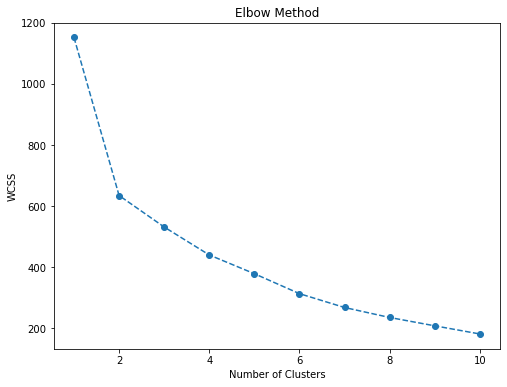

In [105]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [106]:
# Perform K-Means clustering with the chosen number of clusters
n_clusters = 4  # You can change this based on the elbow method graph
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_df)

# Assign clusters to the data
merged_data['Cluster'] = kmeans.labels_

# View the clusters and their characteristics
cluster_characteristics = merged_data.groupby('Cluster')[selected_columns].mean()
print(cluster_characteristics)

         Total Taxable Income  Total Taxes Paid (Accrual)  \
Cluster                                                     
0                1.176272e+04                 2409.165921   
1                1.559718e+06               401406.165000   
2                2.634627e+03                  720.161667   
3                6.731108e+04                20628.975000   

         Total Cash Taxes Paid  Cash Taxes/Accrual Taxes  Aggregate tax rate  \
Cluster                                                                        
0                  2021.147513                  0.912849            0.235167   
1                302801.708000                  0.756300            0.301650   
2                  1254.652000                  1.749600            0.566083   
3                 13144.494333                  0.897242            0.264950   

         Aggregate tax rate.1       ROE  BV of Equity    Equity EVA       ROC  \
Cluster                                                                

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [107]:
# Get the Industry Names and their respective clusters
industry_clusters = merged_data[['Industry Name', 'Cluster']]
print(industry_clusters)

                             Industry Name  Cluster
0                              Advertising        0
1                        Aerospace/Defense        0
2                            Air Transport        0
3                                  Apparel        3
4                             Auto & Truck        0
5                               Auto Parts        2
6                      Bank (Money Center)        3
7                         Banks (Regional)        0
8                     Beverage (Alcoholic)        0
9                          Beverage (Soft)        0
10                            Broadcasting        3
11          Brokerage & Investment Banking        0
12                      Building Materials        0
13            Business & Consumer Services        0
14                                Cable TV        0
15                        Chemical (Basic)        0
16                  Chemical (Diversified)        0
17                    Chemical (Specialty)        0
18          

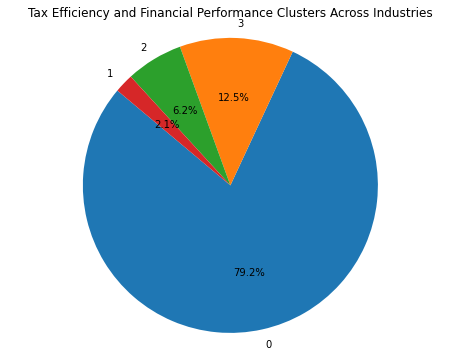

In [37]:
import matplotlib.pyplot as plt

# Count the occurrences of each cluster
cluster_counts = industry_clusters['Cluster'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tax Efficiency and Financial Performance Clusters Across Industries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

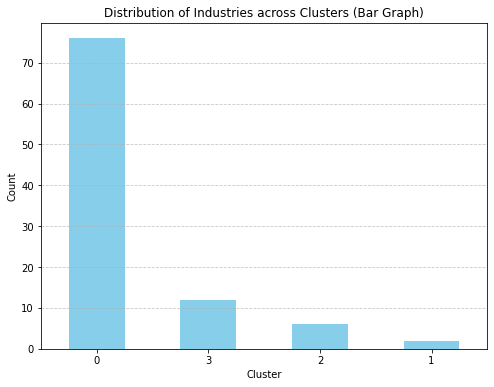

In [38]:
# Count the occurrences of each cluster
cluster_counts = industry_clusters['Cluster'].value_counts()

# Plotting a bar graph
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Industries across Clusters (Bar Graph)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Now we will try to validate the results for K-means clustering we just performed
### Silhouette Score Calculation:

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

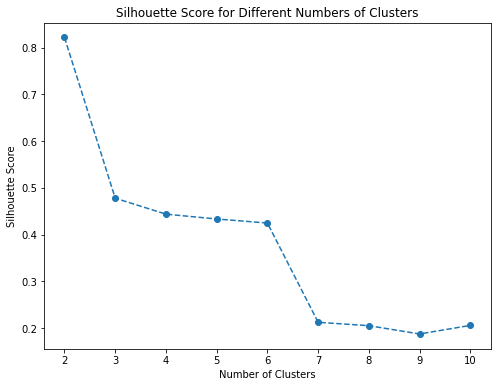

In [39]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):  # Considering 2 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    silhouette = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(silhouette)

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Visulaizing Clusters in Reduced Dimensions

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


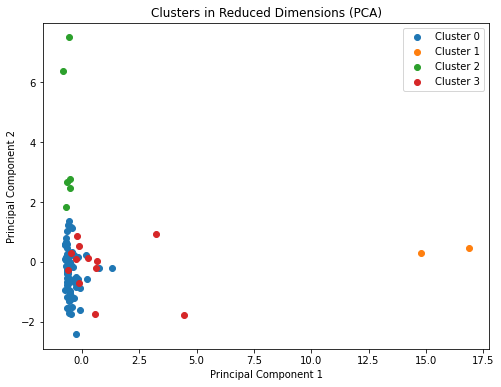

In [40]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Perform K-Means clustering with the chosen number of clusters (for visualization)
n_clusters = 4  # Choose the number of clusters based on earlier assessments
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Visualize clusters in 2D using PCA
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('Clusters in Reduced Dimensions (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

-Cluster 0 and Cluster 3 are relatively close together. This suggests that these two clusters may be more similar to each other than the other clusters.


-Cluster 1 and Cluster 2 are further apart from the other clusters. This suggests that these two clusters may be more distinct from the other clusters.

### Robustness check:

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

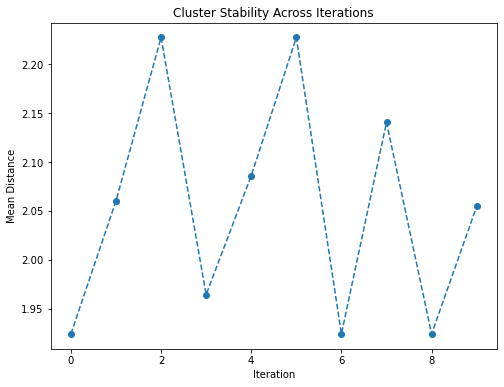

In [41]:
from sklearn.metrics import pairwise_distances

# Define a function to assess cluster stability across multiple iterations
def assess_cluster_stability(data, n_clusters, num_iterations=10):
    stability_scores = []
    for i in range(num_iterations):
        kmeans = KMeans(n_clusters=n_clusters, random_state=i)
        kmeans.fit(data)
        labels = kmeans.labels_
        distance_matrix = pairwise_distances(data)
        mean_distance = np.mean(distance_matrix[np.where(labels[:, None] == labels)])
        stability_scores.append(mean_distance)
    return stability_scores

# Assess cluster stability for a given number of clusters
n_clusters = 4  # Change this to the chosen number of clusters
stability_scores = assess_cluster_stability(scaled_df, n_clusters)

# Visualize the stability scores
plt.figure(figsize=(8, 6))
plt.plot(range(len(stability_scores)), stability_scores, marker='o', linestyle='--')
plt.title('Cluster Stability Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Distance')
plt.show()

### Cluster Profiling:

In [42]:
# Perform K-Means clustering with the chosen number of clusters for profiling
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df)

# Assign clusters to the data
merged_data['Cluster'] = kmeans.labels_

# Compute cluster statistics for selected variables
cluster_stats = merged_data.groupby('Cluster')[selected_columns].agg(['mean', 'median'])

# Display cluster statistics
print(cluster_stats)

        Total Taxable Income              Total Taxes Paid (Accrual)  \
                        mean       median                       mean   
Cluster                                                                
0               1.176272e+04     6638.470                2409.165921   
1               1.559718e+06  1559717.650              401406.165000   
2               2.634627e+03     2842.225                 720.161667   
3               6.731108e+04    46631.545               20628.975000   

                    Total Cash Taxes Paid               \
             median                  mean       median   
Cluster                                                  
0          1210.310           2021.147513    1164.5505   
1        401406.165         302801.708000  302801.7080   
2           706.220           1254.652000     733.4960   
3          8560.050          13144.494333    5818.3360   

        Cash Taxes/Accrual Taxes          Aggregate tax rate           ...  \
          

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


We find distinct values of Mean, Median and Mode

### Cluster 0:
- **Tax Efficiency and Financial Performance:**
  - Shows moderate tax payments (Accrual and Cash), yet Taxable Income is relatively low. This could indicate strategic tax planning or lower revenue streams.
  - Moderate ROE, BV of Equity, and EVA suggest decent but not exceptional financial performance.
  - The company might be optimizing tax liabilities without compromising much on financial returns.

- **Industry Insights:**
  - Likely belongs to industries where moderate financial performance is balanced with tax optimization strategies.
  - Industries might involve steady but not high-growth sectors with a focus on maintaining profitability amid moderate taxation.

### Cluster 1:
- **Tax Efficiency and Financial Performance:**
  - Features exceptionally high Taxable Income and Tax Payments (Accrual and Cash) along with very high financial metrics (ROE, BV of Equity, EVA).
  - Despite high tax contributions, the company maintains superior financial performance.

- **Industry Insights:**
  - Could belong to industries with high-growth potential and substantial profitability despite high tax obligations.
  - Industries might encompass tech, finance, or sectors with high-value products/services and strong market positions.

### Cluster 2:
- **Tax Efficiency and Financial Performance:**
  - Demonstrates lower Taxable Income and Tax Payments (Accrual and Cash) but maintains moderate to high financial metrics (ROE, BV of Equity, EVA).
  - Despite lower taxes paid, financial metrics suggest a decent performance.

- **Industry Insights:**
  - Likely represents industries balancing tax optimization with stable financial performance.
  - Could include sectors that prioritize cost efficiency or have unique tax incentives.

### Cluster 3:
- **Tax Efficiency and Financial Performance:**
  - Shows moderate Taxable Income and Tax Payments (Accrual and Cash) but boasts very high financial metrics (ROE, BV of Equity, EVA).
  - Strong financial performance despite moderate tax payments.

- **Industry Insights:**
  - Likely represents industries with high returns on capital or niche markets leading to exceptional financial performance.
  - Could include sectors with specialized services/products or efficient operational models.

### Comparative Analysis:
- **Tax Efficiency vs. Financial Performance:** Clusters 1 and 3 stand out with both high tax payments and superior financial metrics, showcasing robust performance despite tax obligations.
- **Tax Payment Dynamics:** Clusters 0 and 2 exhibit higher Cash Taxes/Accrual Taxes ratios, indicating substantial cash tax payments relative to the accruals, possibly reflecting cash flow strategies or tax liabilities timing.

### Strategic Considerations:
- **Cluster-specific Strategies:** Tailor strategies based on the cluster's tax and financial characteristics to maximize tax benefits while ensuring sustained financial growth.
- **Industry-specific Insights:** Explore industry-specific factors driving tax efficiency and financial performance within each cluster.

### General Observations:
- **Cluster 1** stands out with the highest financial performance metrics, despite high taxes.
- **Cluster 0** and **Cluster 2** show a higher Cash Taxes/Accrual Taxes ratio, suggesting significant cash tax payments.
- **Cluster 3** exhibits very high ROE and financial performance.
- **Cluster 2** has high tax efficiency with a low Aggregate tax rate despite moderate financial performance.

### Impact of Tax Rates on Industry Performance:

#### Tax Efficiency and Financial Metrics:

1. **Tax Efficiency & Profitability:**
   - **Cluster 2** demonstrates a notably high aggregate tax rate (56.6%) but maintains a relatively lower profitability compared to Clusters 1 and 3.
   - Despite a high tax rate, the efficiency of tax payments (cash/accrual ratio of 1.75) might be negatively affecting profitability, as seen in the moderate return metrics and EVA compared to Cluster 1.

2. **Tax Rates & Return Metrics:**
   - **Clusters 0 and 3** show moderate tax rates and a more balanced financial performance, with varying returns on equity (ROE) and return on capital (ROC). 
   - Cluster 3 particularly stands out with a higher ROE and ROC despite a slightly lower aggregate tax rate, suggesting higher efficiency in utilizing capital to generate profits despite moderate tax burdens.

#### Relationship Between Tax Rates & Financial Metrics:

1. **High Tax Rates & Impact on Profitability:**
   - **Cluster 1** exhibits the highest tax rates (30.2%), leading to substantial tax payments. However, it maintains impressive profitability, as evidenced by substantial net income, high ROE, and considerable EVA despite the tax burden.
   - This cluster showcases how industries can operate efficiently despite high tax rates, suggesting effective management of resources and financial strategies.

2. **Moderate Tax Rates & Financial Performance:**
   - **Clusters 0 and 3** present varying tax rates around the mid-20% range, yet they showcase differing profitability levels.
   - Cluster 3, with slightly higher tax rates, manages to achieve a higher return on equity and capital, indicating a potentially more efficient use of resources despite similar tax burdens.

### Overall Relationship Between Tax Efficiency & Financial Metrics:

1. **Tax Efficiency & Profitability Impact:**
   - The analysis illustrates that tax efficiency, as measured by the cash/accrual tax ratio, doesn't solely determine profitability.
   - Other factors, such as effective resource utilization and capital management, play significant roles in driving profitability, even in the presence of varying tax rates.

2. **Tax Rates as a Component, not Sole Determinant:**
   - While tax rates influence financial metrics, they aren't the sole determining factor for profitability. Efficiency in capital utilization, operational management, and strategic decision-making also significantly impact industry performance.

### Conclusion:

In assessing the impact of tax rates on industry performance in Europe for 2022, it's evident that tax efficiency and tax rates do affect financial metrics and profitability. However, high tax rates don't necessarily equate to lower profitability, as demonstrated by Cluster 1. Additionally, moderate tax rates (Clusters 0 and 3) can coexist with varying levels of profitability, suggesting that effective resource management and strategic decisions are crucial alongside tax planning to drive industry performance.

### In-Depth Analysis on the Impact of Tax Rates on Industry Performance (Europe, 2022):

#### 1. **Cluster Tax Rate Variances:**
   - **Tax Rates Influence:** Clusters with higher tax rates (e.g., Cluster 2 with 56.6%) may face challenges in tax efficiency compared to clusters with lower rates (e.g., Cluster 0 with 23.5%). This variation suggests potential implications for industry performance.

#### 2. **Tax Efficiency Metrics:**
   - **Cash/Accrual Ratio (Cluster 2):** With a ratio of 1.75, Cluster 2 indicates a preference for higher cash tax payments relative to accrual taxes. This may impact liquidity and cash flow dynamics within the industry.

#### 3. **Financial Metrics & Tax Rates:**
   - **Return on Equity (ROE):**
     - **Cluster 3 (High ROE, Moderate Tax):** High ROE (31.5%) with a moderate aggregate tax rate (26.5%) suggests efficient utilization of equity, possibly indicating a robust industry.
     - **Cluster 0 (Moderate ROE, Low Tax):** Moderate ROE (10.4%) with a lower tax rate (23.5%) highlights potential efficiency but with room for improvement.

   - **Return on Capital (ROC):**
     - **Cluster 2 (Low ROC, High Tax):** Despite a higher tax rate, Cluster 2 exhibits a lower ROC (8.2%), indicating potential inefficiencies in capital utilization.
     - **Cluster 3 (High ROC, Moderate Tax):** High ROC (27.3%) coupled with a moderate tax rate suggests efficient capital deployment in Cluster 3.

   - **Equity Economic Value Added (EVA):**
     - **Cluster 1 (Highest EVA, High Tax):** Despite a high tax rate (30.2%), Cluster 1 demonstrates the highest EVA (€68.83 billion), implying effective value creation.
     - **Cluster 2 (Lowest EVA, Highest Tax):** With the lowest EVA (€5.05 billion) and the highest tax rate (56.6%), Cluster 2 may need to optimize value-added processes.

#### 4. **Profitability & Tax Rates:**
   - **Net Income:**
     - **Cluster 1 (Highest Net Income, High Tax):** Despite a high tax rate, Cluster 1 exhibits the highest net income (€1.02 trillion), indicating robust profitability.
     - **Cluster 2 (Lowest Net Income, Highest Tax):** Cluster 2 has the lowest net income (€4.26 billion) with the highest tax rate, signaling potential profitability challenges.

### Cluster 0:
- **Taxable Income & Taxes:**
  - **Total Taxable Income:** €11.76 billion
  - **Total Taxes Paid (Accrual):** €2.41 billion
  - **Total Cash Taxes Paid:** €2.02 billion
  - **Cash/Accrual Taxes Ratio:** 0.91
- **Tax Rates & Efficiency:**
  - **Aggregate Tax Rate:** 23.5%
  - **Aggregate Tax Rate (Alt):** 21.0%
- **Financial Performance:**
  - **ROE:** 10.4%
  - **BV of Equity:** €80.98 billion
  - **Equity EVA:** €4.41 billion
  - **ROC:** 9.8%
  - **EVA:** €6.13 billion
  - **Net Income:** €7.98 billion
- **Analysis:** Cluster 0 portrays moderate taxable income and tax payments with relatively efficient tax rates. While financial performance is decent, there's potential for optimizing equity and improving return metrics.

### Cluster 1:
- **Taxable Income & Taxes:**
  - **Total Taxable Income:** €1.56 trillion
  - **Total Taxes Paid (Accrual):** €401.41 billion
  - **Total Cash Taxes Paid:** €302.80 billion
  - **Cash/Accrual Taxes Ratio:** 0.76
- **Tax Rates & Efficiency:**
  - **Aggregate Tax Rate:** 30.2%
  - **Aggregate Tax Rate (Alt):** 23.1%
- **Financial Performance:**
  - **ROE:** 12.8%
  - **BV of Equity:** €8.06 trillion
  - **Equity EVA:** €68.83 billion
  - **ROC:** 9.2%
  - **EVA:** €219.43 billion
  - **Net Income:** €1.02 trillion
- **Analysis:** Cluster 1 represents substantial taxable income and tax payments with relatively higher tax rates. Despite this, it showcases exceptional financial performance, with high equity, robust EVA, and substantial net income.

### Cluster 2:
- **Taxable Income & Taxes:**
  - **Total Taxable Income:** €2.63 billion
  - **Total Taxes Paid (Accrual):** €0.72 billion
  - **Total Cash Taxes Paid:** €1.25 billion
  - **Cash/Accrual Taxes Ratio:** 1.75
- **Tax Rates & Efficiency:**
  - **Aggregate Tax Rate:** 56.6%
  - **Aggregate Tax Rate (Alt):** 72.7%
- **Financial Performance:**
  - **ROE:** 13.1%
  - **BV of Equity:** €29.16 billion
  - **Equity EVA:** €5.05 billion
  - **ROC:** 8.2%
  - **EVA:** €2.54 billion
  - **Net Income:** €4.26 billion
- **Analysis:** Cluster 2 displays lower taxable income and tax payments but with significantly higher tax rates. This cluster exhibits relatively lower financial metrics compared to others, highlighting potential challenges in tax efficiency and value creation.

### Cluster 3:
- **Taxable Income & Taxes:**
  - **Total Taxable Income:** €67.31 billion
  - **Total Taxes Paid (Accrual):** €20.63 billion
  - **Total Cash Taxes Paid:** €13.14 billion
  - **Cash/Accrual Taxes Ratio:** 0.90
- **Tax Rates & Efficiency:**
  - **Aggregate Tax Rate:** 26.5%
  - **Aggregate Tax Rate (Alt):** 21.2%
- **Financial Performance:**
  - **ROE:** 31.5%
  - **BV of Equity:** €276.62 billion
  - **Equity EVA:** €27.66 billion
  - **ROC:** 27.3%
  - **EVA:** €52.36 billion
  - **Net Income:** €46.14 billion
- **Analysis:** Cluster 3 represents moderate-to-high taxable income and tax payments with moderate tax rates. It exhibits exceptional financial metrics, especially in ROE, ROC, EVA, and net income, indicating strong tax efficiency and substantial value creation.


### Key Insights:
- **Diverse Industry Dynamics:** The clusters represent diverse industry dynamics, emphasizing the need for nuanced strategies based on tax rates and efficiency.
- **Optimization Opportunities:** Clusters with lower tax rates (e.g., Cluster 0) may have room for tax optimization to enhance profitability and financial metrics.
- **Strategic Focus:** Industries in Cluster 1 demonstrate high profitability despite higher tax rates, suggesting potential strategic advantages in value creation.

### Recommendations:
1. **Tax Efficiency Initiatives:** Industries with higher tax rates (Cluster 2) may benefit from tax efficiency initiatives to improve cash flow and overall financial health.
2. **Value Creation Strategies:** Emulate strategies from Cluster 1 to maximize EVA and profitability, even in the presence of relatively higher tax rates.
3. **Benchmarking and Best Practices:** Industries in Cluster 0 could explore benchmarking against Cluster 1 for best practices in achieving higher profitability with moderate tax rates.

### 3. Cost of Capital and Risk Evaluation:
What insights can be gained by comparing the cost of capital and risk factors (beta, cost of debt) across different industries, and how do these factors influence financial performance and market dynamics in the given year?

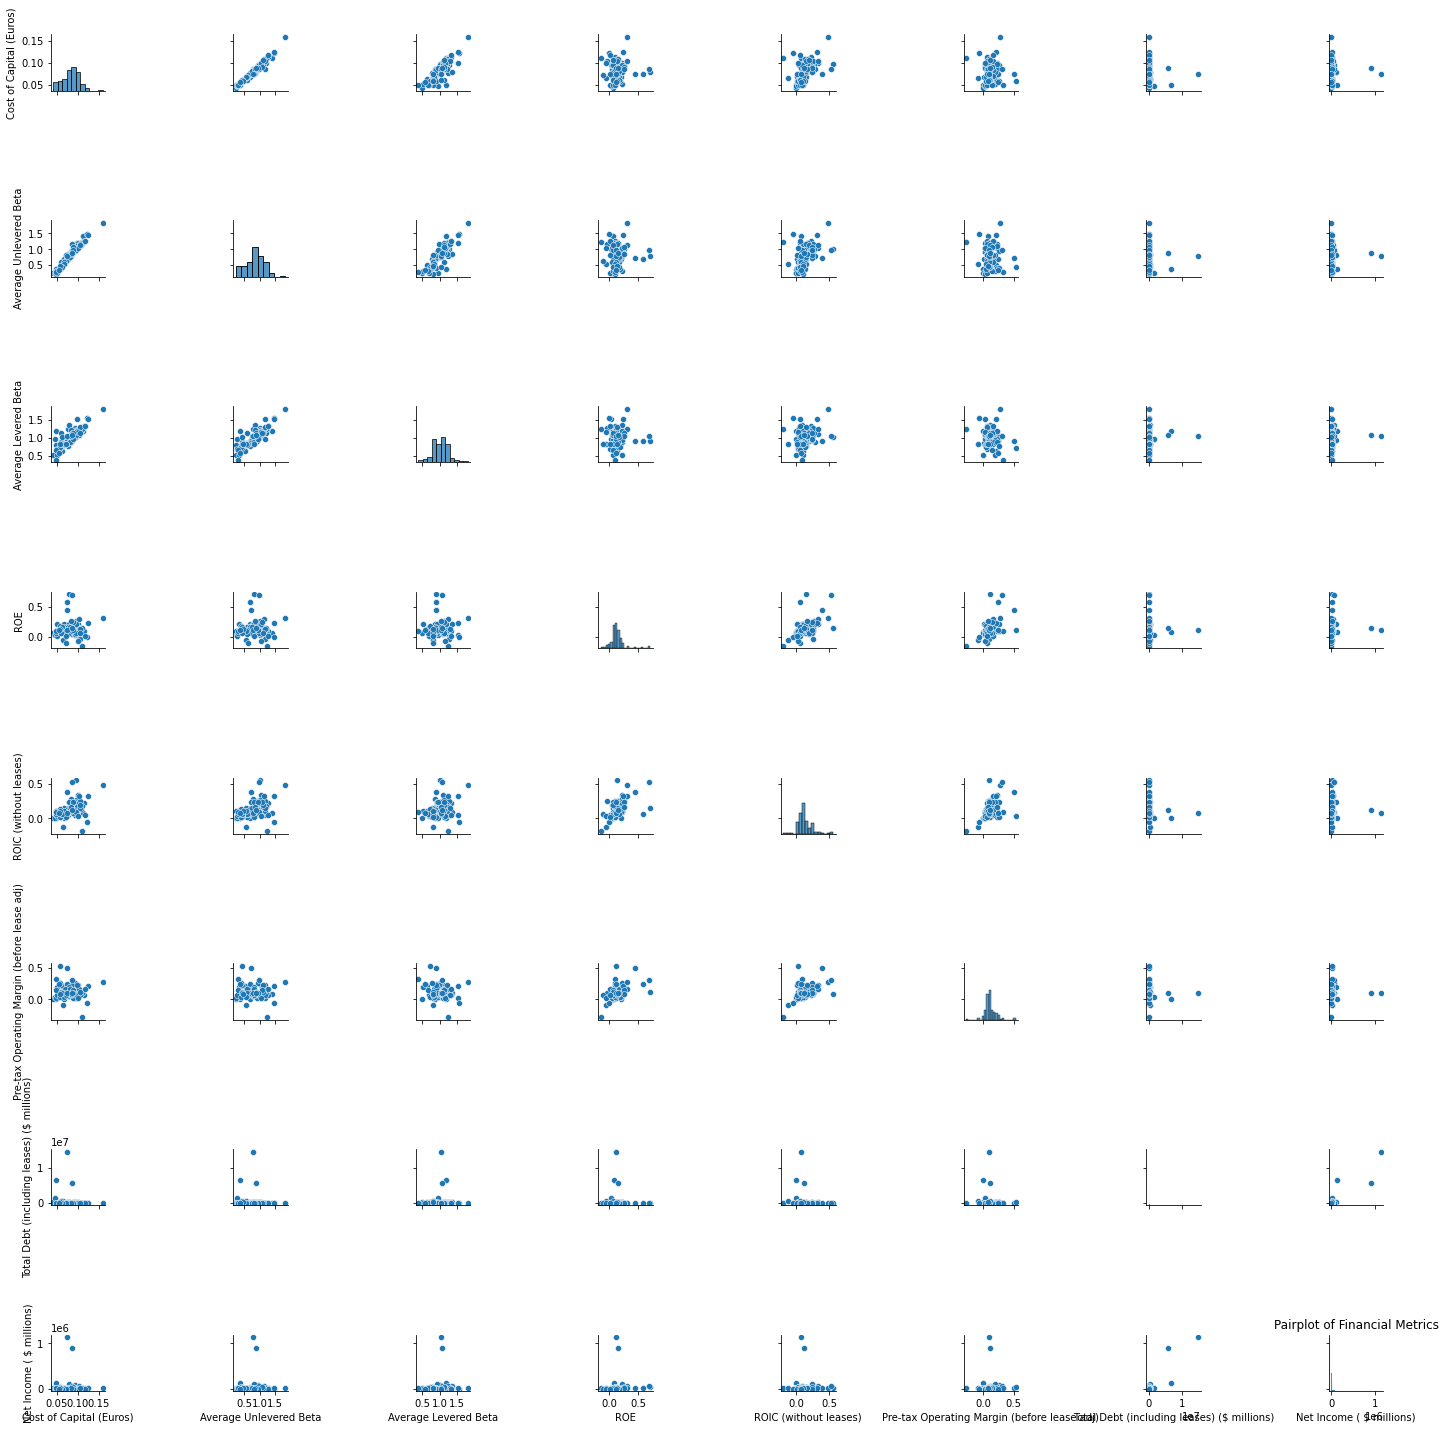

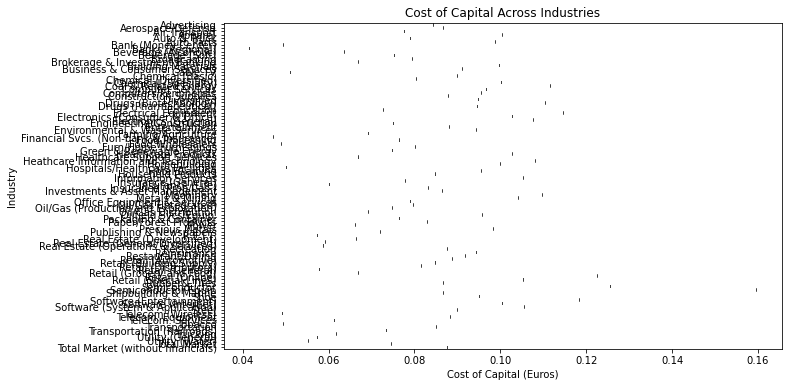

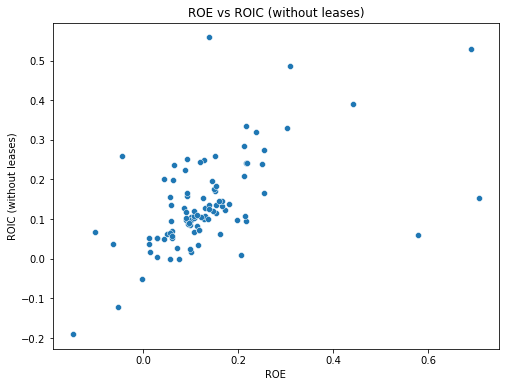

<ipython-input-43-4dfac703e536>:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = relevant_data.corr()


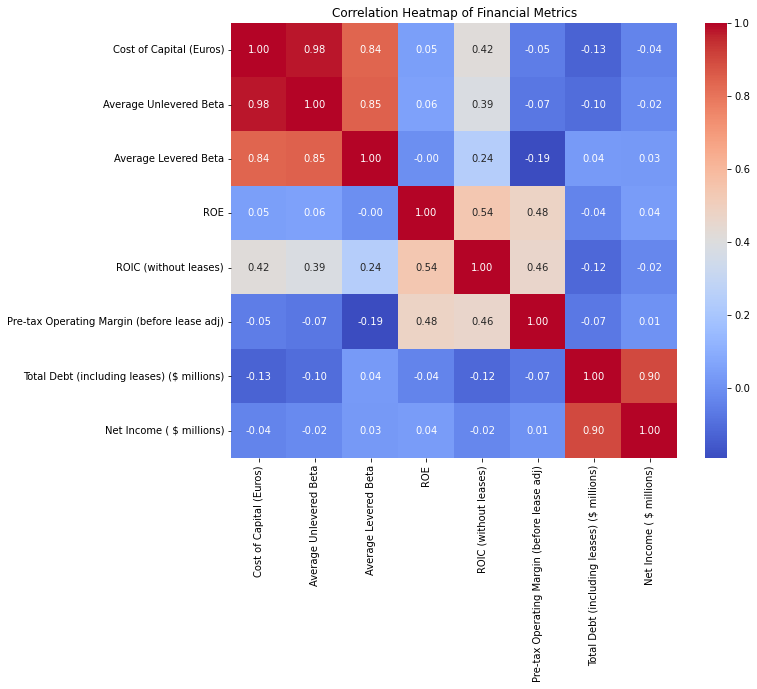

In [43]:
# Relevant columns for analysis
relevant_columns = [
    'Industry Name', 'Cost of Capital (Euros)', 'Average Unlevered Beta',
    'Average Levered Beta', 'ROE', 'ROIC (without leases)',
    'Pre-tax Operating Margin (before lease adj)',
    'Total Debt (including leases) ($ millions)',
    'Net Income ( $ millions)'
]

# Subset relevant data
relevant_data = merged_data[relevant_columns]

# Pairplot for a general overview of relationships between numerical variables
sns.pairplot(relevant_data.dropna())
plt.title('Pairplot of Financial Metrics')
plt.show()

# Boxplot for Cost of Capital across industries
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cost of Capital (Euros)', y='Industry Name', data=relevant_data)
plt.title('Cost of Capital Across Industries')
plt.xlabel('Cost of Capital (Euros)')
plt.ylabel('Industry')
plt.show()

# Scatterplot for ROE and ROIC
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ROE', y='ROIC (without leases)', data=relevant_data)
plt.title('ROE vs ROIC (without leases)')
plt.xlabel('ROE')
plt.ylabel('ROIC (without leases)')
plt.show()

# Heatmap for correlation among numerical variables
plt.figure(figsize=(10, 8))
corr = relevant_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()

### Factor Analysis using PCA:

Using PCA to find important features (Financial Parameter)

In [44]:
#keep 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant columns for factor analysis
factor_analysis_columns = [
    'Cost of Capital (Euros)', 'Average Unlevered Beta',
    'Average Levered Beta', 'ROE', 'ROIC (without leases)',
    'Total Debt (including leases) ($ millions)',
    'Net Income ( $ millions)'
]

# Subset the data for factor analysis
factor_data = merged_data[factor_analysis_columns]

# Scale the data before performing PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(factor_data.dropna())

# Initialize PCA with desired number of components
num_components = 3  # You can adjust this number based on the desired components
pca = PCA(n_components=num_components)

# Fit PCA to the scaled data
pca.fit(scaled_data)

# Get the principal components and their explained variance ratios
principal_components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Print explained variance ratios for each principal component
for i, ev in enumerate(explained_variance):
    print(f"Explained Variance for PC{i + 1}: {ev:.4f}")

# Determine the loadings of each variable on the principal components
loadings = pd.DataFrame(principal_components.T, columns=[f"PC{i + 1}" for i in range(num_components)], index=factor_analysis_columns)
print("\nLoadings of Variables on Principal Components:")
print(loadings)

Explained Variance for PC1: 0.4296
Explained Variance for PC2: 0.2713
Explained Variance for PC3: 0.2005

Loadings of Variables on Principal Components:
                                                 PC1       PC2       PC3
Cost of Capital (Euros)                     0.557105  0.040217 -0.135390
Average Unlevered Beta                      0.554262  0.060616 -0.142402
Average Levered Beta                        0.502854  0.133163 -0.222943
ROE                                         0.115686 -0.017686  0.750969
ROIC (without leases)                       0.320976 -0.038556  0.582319
Total Debt (including leases) ($ millions) -0.100837  0.697376  0.023968
Net Income ( $ millions)                   -0.054665  0.699174  0.089796


### Explained Variance for Principal Components:
- **PC1 Explained Variance:** 42.96%
- **PC2 Explained Variance:** 27.13%
- **PC3 Explained Variance:** 20.05%

### Loadings of Variables on Principal Components:
- **PC1:**
  - **Dominant Variables:** Cost of Capital, Average Unlevered Beta, Average Levered Beta
  - **Interpretation:** PC1 is mainly influenced by financial metrics related to capital cost and risk factors. Industries with higher scores on PC1 might exhibit higher overall risk profiles or financial leverage.

- **PC2:**
  - **Dominant Variables:** Total Debt (including leases), Net Income
  - **Interpretation:** PC2 seems to capture metrics related to financial structure and profitability. Industries with higher scores on PC2 might have higher debt levels and net income, indicating financial stability or leveraging for growth.

- **PC3:**
  - **Dominant Variables:** ROE, ROIC (without leases)
  - **Interpretation:** PC3 reflects metrics related to return on equity and operational efficiency. Industries with higher scores on PC3 might showcase better performance in terms of returns and operational effectiveness.

### Inferences:
- **Cost of Capital and Risk Factors (PC1):** Industries scoring higher on PC1 might face higher financial risk due to elevated cost of capital and beta values.
- **Financial Structure and Profitability (PC2):** Industries scoring higher on PC2 have higher total debt but also tend to exhibit higher net income, suggesting a balanced approach to leveraging for growth and profitability.
- **Return and Operational Efficiency (PC3):** Industries scoring higher on PC3 demonstrate better returns on equity and operational efficiency, likely indicating more efficient utilization of resources.



### 4. Operational Efficiency Differences: 

How do differences in operational aspects, such as operating leases and debt structures, affect operational income, Return on Invested Capital (ROIC), and pre-tax margins among various industries?

### 1. Lease Expense/ Sales: 
This ratio indicates how much of the sales revenue is going towards lease expenses. Higher values might indicate higher dependence on leased assets.

In [45]:
# Calculate 'Lease Expense/ Sales' ratio
merged_data['Lease Expense/ Sales'] = merged_data['Lease Expense/ Sales']

# Group by Industry Name and calculate the mean of 'Lease Expense/ Sales'
industry_lease_expense_sales = merged_data.groupby('Industry Name')['Lease Expense/ Sales'].mean()

# Set the maximum rows to display in Pandas
pd.set_option('display.max_rows', None)

# Display the entire Series
print(industry_lease_expense_sales)

# Display 'Lease Expense/ Sales' for each Industry Name
print(industry_lease_expense_sales)

Industry Name
Advertising                               0.0085
Aerospace/Defense                         0.0005
Air Transport                             0.0249
Apparel                                   0.0441
Auto & Truck                              0.0010
Auto Parts                                0.0099
Bank (Money Center)                       0.0040
Banks (Regional)                          0.0110
Beverage (Alcoholic)                      0.0019
Beverage (Soft)                           0.0017
Broadcasting                              0.0093
Brokerage & Investment Banking            0.0032
Building Materials                        0.0055
Business & Consumer Services              0.0054
Cable TV                                  0.0092
Chemical (Basic)                          0.0029
Chemical (Diversified)                    0.0021
Chemical (Specialty)                      0.0020
Coal & Related Energy                     0.0067
Computer Services                         0.0065
Comput

The 'Lease Expense/ Sales' ratio provides insights into how much of a company's sales revenue is allocated towards lease expenses. Looking at the provided data, a few observations and inferences can be drawn:

1. **Variation Across Industries:** There's substantial variation in the 'Lease Expense/ Sales' ratio across different industries. For instance, industries like 'Environmental & Waste Services,' 'Shipbuilding & Marine,' and 'Apparel' exhibit notably higher ratios, indicating a more significant portion of their sales being spent on lease expenses.

2. **Impact on Operational Costs:** Industries with higher 'Lease Expense/ Sales' ratios, such as 'Environmental & Waste Services' and 'Shipbuilding & Marine,' might have higher operational costs due to substantial lease-related expenditures. This could affect their profit margins and overall financial performance.

3. **Industry-specific Trends:** Certain sectors, like 'Telecom. Services' and 'Hospitals/Healthcare Facilities,' show moderate ratios, suggesting moderate reliance on lease expenses compared to their total sales. On the other hand, industries like 'Oil/Gas Distribution' exhibit negative ratios, indicating potential complexities or anomalies in accounting for lease expenses.

4. **Outliers and Potential Concerns:** Negative ratios, as observed in 'Oil/Gas Distribution,' might signal anomalies in the data or non-standard accounting practices, requiring further investigation. Additionally, industries with exceptionally high ratios, such as 'Environmental & Waste Services,' could signify heavy dependence on leased assets or potential inefficiencies in managing lease expenses.

5. **Impact on Financial Health:** Industries with higher 'Lease Expense/ Sales' ratios may face greater financial risks if lease-related costs are not efficiently managed. This could affect their ability to generate profits and manage cash flows effectively.

6. **Comparative Analysis:** Comparing industries with similar operations or market positioning but differing 'Lease Expense/ Sales' ratios could provide insights into industry norms, cost structures, and potential areas for operational improvement.

In [46]:
# categorize industries based on their 'Lease Expense/ Sales' ratio values

# Calculate 'Lease Expense/ Sales' ratio
merged_data['Lease Expense/ Sales'] = merged_data['Lease Expense/ Sales']

# Group by Industry Name and calculate the mean of 'Lease Expense/ Sales'
industry_lease_expense_sales = merged_data.groupby('Industry Name')['Lease Expense/ Sales'].mean()

# Calculate quantiles to categorize data
quantiles = industry_lease_expense_sales.quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

# Function to categorize values based on quantiles
def categorize_expense(value):
    if value <= quantiles[0.2]:
        return "Very Low"
    elif quantiles[0.2] < value <= quantiles[0.4]:
        return "Low"
    elif quantiles[0.4] < value <= quantiles[0.6]:
        return "Moderate"
    elif quantiles[0.6] < value <= quantiles[0.8]:
        return "High"
    else:
        return "Very High"

# Apply categorization to the 'Lease Expense/ Sales' data
industry_lease_expense_sales_categorized = industry_lease_expense_sales.apply(categorize_expense)

# Display the categorized data
print(industry_lease_expense_sales_categorized)

Industry Name
Advertising                               Very High
Aerospace/Defense                          Very Low
Air Transport                             Very High
Apparel                                   Very High
Auto & Truck                               Very Low
Auto Parts                                Very High
Bank (Money Center)                        Moderate
Banks (Regional)                          Very High
Beverage (Alcoholic)                       Very Low
Beverage (Soft)                            Very Low
Broadcasting                              Very High
Brokerage & Investment Banking             Moderate
Building Materials                             High
Business & Consumer Services                   High
Cable TV                                  Very High
Chemical (Basic)                                Low
Chemical (Diversified)                          Low
Chemical (Specialty)                       Very Low
Coal & Related Energy                          Hig

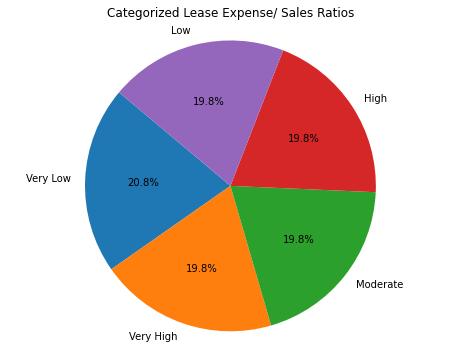

In [47]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = industry_lease_expense_sales_categorized.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Categorized Lease Expense/ Sales Ratios')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Create a bar graph
# plt.figure(figsize=(10, 6))
# category_counts.plot(kind='bar', color='skyblue')
# plt.xlabel('Categories')
# plt.ylabel('Counts')
# plt.title('Counts of Categorized Lease Expense/ Sales Ratios')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

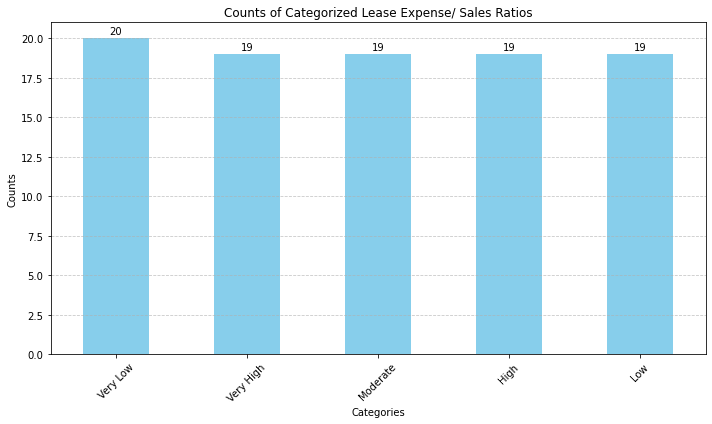

In [48]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = industry_lease_expense_sales_categorized.value_counts()

# Create a bar graph with counts annotated in the center
plt.figure(figsize=(10, 6))
bars = category_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Counts of Categorized Lease Expense/ Sales Ratios')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate counts on top of bars
for bar, count in zip(bars.patches, category_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, count, ha='center', va='bottom')

plt.tight_layout()
plt.show()

1. **'Lease Expense/ Sales':** This ratio indicates how much of the sales revenue is going towards lease expenses. Higher values might indicate higher dependence on leased assets.

2. **'Total Debt without leases'** and **'Total Debt with Leases':** These columns show the total debt a company has, both with and without lease obligations. Comparing them can reveal how lease obligations impact a company's overall debt structure.

3. **'Operating income (before lease adj)'** and **'Operating income (after lease adj)':** These columns reflect the impact of lease adjustments on operating income, showing how different companies handle lease accounting and how it affects their financial performance.

4. **'ROIC (without leases)'** and **'ROIC (with leases)':** Return on Invested Capital (ROIC) with and without considering lease obligations. This comparison is crucial to understanding how leases affect the returns a company generates on its invested capital.

5. **'Pre-tax Operating Margin (before lease adj)'** and **'Pre-tax Operating Margin (after lease adj)':** Similar to operating income, these columns show how pre-tax margins are affected by lease adjustments, offering insights into the efficiency of operations.

In [49]:
# Calculate quartiles for 'Total Debt without leases' and 'Total Debt with Leases'
total_debt_without_leases_quartiles = merged_data['Total Debt without leases'].quantile([0, 0.25, 0.5, 0.75, 1])
total_debt_with_leases_quartiles = merged_data['Total Debt with Leases'].quantile([0, 0.25, 0.5, 0.75, 1])

# Define function to categorize debt based on quartiles
def categorize_debt(x, quartiles):
    if x <= quartiles[0.25]:
        return 'Very Low'
    elif x <= quartiles[0.5]:
        return 'Low'
    elif x <= quartiles[0.75]:
        return 'Medium'
    else:
        return 'High'

# Apply quartile categorization to 'Total Debt without leases' and 'Total Debt with Leases'
merged_data['Debt Category without Leases'] = merged_data['Total Debt without leases'].apply(lambda x: categorize_debt(x, total_debt_without_leases_quartiles))
merged_data['Debt Category with Leases'] = merged_data['Total Debt with Leases'].apply(lambda x: categorize_debt(x, total_debt_with_leases_quartiles))

# Print summary of categories
print("Summary of Debt Categories without Leases:")
print(merged_data['Debt Category without Leases'].value_counts())

print("\nSummary of Debt Categories with Leases:")
print(merged_data['Debt Category with Leases'].value_counts())

Summary of Debt Categories without Leases:
Low         24
Medium      24
High        24
Very Low    24
Name: Debt Category without Leases, dtype: int64

Summary of Debt Categories with Leases:
Low         24
Medium      24
High        24
Very Low    24
Name: Debt Category with Leases, dtype: int64


In [50]:
# categorizing industries based on their Debt category

# Calculate quartiles for 'Total Debt without leases' and 'Total Debt with Leases'
total_debt_without_leases_quartiles = merged_data['Total Debt without leases'].quantile([0, 0.25, 0.5, 0.75, 1])
total_debt_with_leases_quartiles = merged_data['Total Debt with Leases'].quantile([0, 0.25, 0.5, 0.75, 1])

# Define function to categorize debt based on quartiles
def categorize_debt(x, quartiles):
    if x <= quartiles[0.25]:
        return 'Very Low'
    elif x <= quartiles[0.5]:
        return 'Low'
    elif x <= quartiles[0.75]:
        return 'Medium'
    else:
        return 'High'

# Apply quartile categorization to 'Total Debt without leases' and 'Total Debt with Leases'
merged_data['Debt Category without Leases'] = merged_data['Total Debt without leases'].apply(lambda x: categorize_debt(x, total_debt_without_leases_quartiles))
merged_data['Debt Category with Leases'] = merged_data['Total Debt with Leases'].apply(lambda x: categorize_debt(x, total_debt_with_leases_quartiles))

# Group by Industry and show the categories
debt_categories_by_industry = merged_data[['Industry Name', 'Debt Category without Leases', 'Debt Category with Leases']]

# Display categories for each Industry
debt_categories_by_industry

,Industry Name,Debt Category without Leases,Debt Category with Leases
0,Advertising,Low,Low
1,Aerospace/Defense,Medium,Medium
2,Air Transport,High,High
3,Apparel,High,High
4,Auto & Truck,High,High
5,Auto Parts,Medium,Medium
6,Bank (Money Center),High,High
7,Banks (Regional),High,High
8,Beverage (Alcoholic),High,High
9,Beverage (Soft),Low,Low


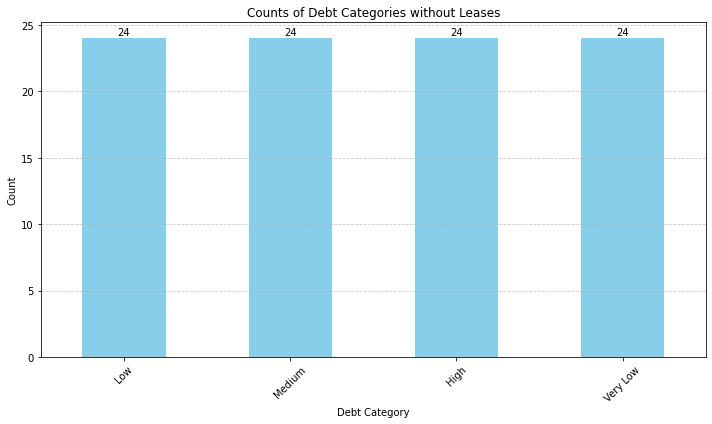

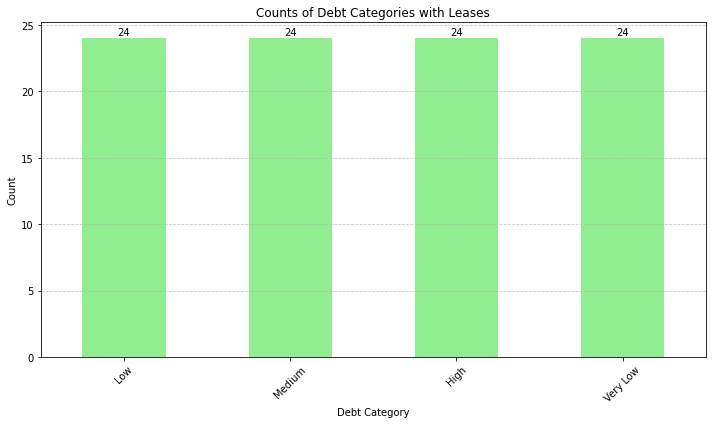

In [51]:
import matplotlib.pyplot as plt

# Plotting Debt Category without Leases
plt.figure(figsize=(10, 6))
debt_without_leases_counts = debt_categories_by_industry['Debt Category without Leases'].value_counts()
debt_without_leases_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Debt Category')
plt.ylabel('Count')
plt.title('Counts of Debt Categories without Leases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate counts on top of bars
for bar, count in zip(plt.gca().patches, debt_without_leases_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, count, ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plotting Debt Category with Leases
plt.figure(figsize=(10, 6))
debt_with_leases_counts = debt_categories_by_industry['Debt Category with Leases'].value_counts()
debt_with_leases_counts.plot(kind='bar', color='lightgreen')

plt.xlabel('Debt Category')
plt.ylabel('Count')
plt.title('Counts of Debt Categories with Leases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate counts on top of bars
for bar, count in zip(plt.gca().patches, debt_with_leases_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, count, ha='center', va='bottom')

plt.tight_layout()
plt.show()

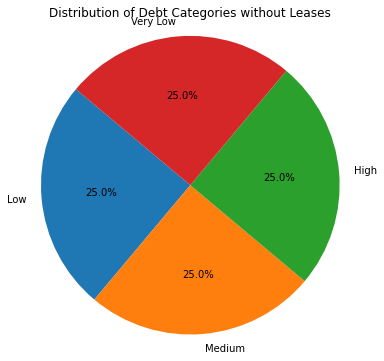

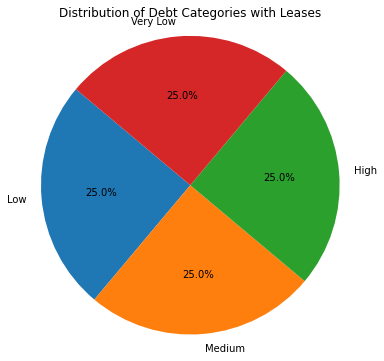

In [52]:
import matplotlib.pyplot as plt

# Plotting Pie Chart for Debt Category without Leases
plt.figure(figsize=(6, 6))
debt_without_leases_counts = debt_categories_by_industry['Debt Category without Leases'].value_counts()
plt.pie(debt_without_leases_counts, labels=debt_without_leases_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Debt Categories without Leases')
plt.axis('equal')
plt.show()

# Plotting Pie Chart for Debt Category with Leases
plt.figure(figsize=(6, 6))
debt_with_leases_counts = debt_categories_by_industry['Debt Category with Leases'].value_counts()
plt.pie(debt_with_leases_counts, labels=debt_with_leases_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Debt Categories with Leases')
plt.axis('equal')
plt.show()

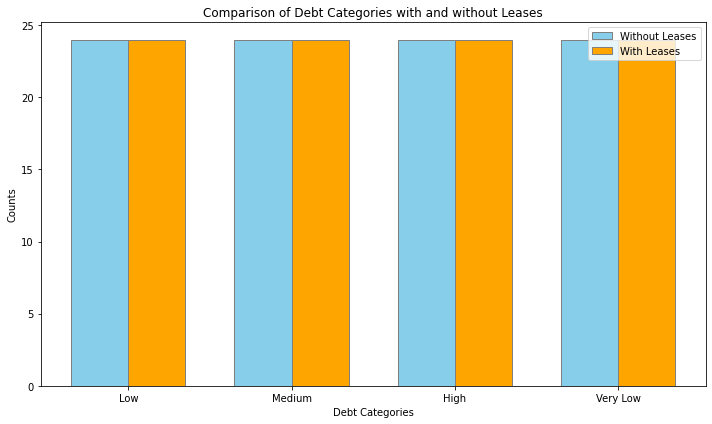

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of each category for Debt Category without Leases
debt_without_leases_counts = debt_categories_by_industry['Debt Category without Leases'].value_counts()

# Count the occurrences of each category for Debt Category with Leases
debt_with_leases_counts = debt_categories_by_industry['Debt Category with Leases'].value_counts()

# Get unique categories for x-axis labels
categories = debt_without_leases_counts.index

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, debt_without_leases_counts, color='skyblue', width=bar_width, edgecolor='grey', label='Without Leases')
plt.bar(r2, debt_with_leases_counts, color='orange', width=bar_width, edgecolor='grey', label='With Leases')

# Add labels, title, and legend
plt.xlabel('Debt Categories')
plt.ylabel('Counts')
plt.title('Comparison of Debt Categories with and without Leases')
plt.xticks([r + bar_width / 2 for r in range(len(categories))], categories)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

### Very Low Debt Categories:
1. **Broadcasting, Cable TV, Computers/Peripherals, Electrical Equipment:** Demonstrates consistently low debt levels, suggesting a cautious approach to financing.
2. **Telecom. Equipment, Shoe, Software (Entertainment), Software (Internet):** Shows consistently low debt categories, indicating a conservative financial strategy.
3. **Chemical (Basic), Coal & Related Energy, Engineering/Construction:** Reflects very low debt categories, showcasing a conservative financing strategy.
4. **Environmental & Waste Services, Food Processing, Green & Renewable Energy:** Demonstrates very low debt profiles, reflecting a prudent approach to capital management.

### Low Debt Categories:
5. **Advertising, Aerospace/Defense, Auto & Truck, Brokerage & Investment Banking:** Exhibits low debt levels, potentially reflecting conservative financing strategies.
6. **Chemical (Diversified), Drugs (Biotechnology), Drugs (Pharmaceutical), Electrical Equipment:** Maintains low debt levels, showcasing a conservative approach to debt management.
7. **Financial Svcs. (Non-bank & Insurance), Household Products, Information Services:** Demonstrates low debt categories, possibly indicating a balanced approach to financing.
8. **Machinery, Metals & Mining, Oil/Gas Distribution:** Reflects low debt categories, suggesting a balanced approach to capital utilization.

### Medium Debt Categories:
9. **Auto Parts, Building Materials, Business & Consumer Services, Computers/Peripherals:** Shows moderate debt levels, indicating a balanced approach to financing growth.
10. **Diversified, Electronics (Consumer & Office), Food Wholesalers, Healthcare Support Services:** Demonstrates moderate debt profiles, balancing growth and financial stability.
11. **Investments & Asset Management, Packaging & Container, Precious Metals:** Reflects moderate debt levels, suggesting a balanced approach to capital utilization.
12. **Retail (Distributors), Retail (General), Retail (Online):** Displays moderate debt categories, possibly indicating a balanced financing strategy.

### High Debt Categories:
13. **Air Transport, Apparel, Banks (Regional), Beverage (Alcoholic):** Exhibits consistently high debt levels both with and without leases, suggesting capital-intensive operations.
14. **Oil/Gas (Integrated), Real Estate (Development), Total Market (with and without financials):** Shows high debt categories, indicating significant capital requirements and financial leveraging.
15. **Telecom (Wireless), Transportation, Transportation (Railroads):** Demonstrates high debt categories, indicating a substantial influence of lease obligations on financial structures.

### Varied Debt Impact:
16. **Healthcare Products, Oil/Gas (Production and Exploration), Real Estate (Operations & Services):** Displays varied impacts of debt due to lease obligations, showcasing nuanced financial structures.
  
### Consistent Debt Categories:
17. **Entertainment, Insurance (General), Insurance (Life), Retail (Special Lines):** Maintains consistent debt categorization, indicating stable financial structures.
18. **R.E.I.T., Reinsurance, Tobacco:** Reflects consistent debt categorization, signifying stable financial structures.

### Impact of Lease Obligations:
19. **Total Market (with and without financials), Banks (Regional), Telecom. Services:** These sectors exhibit high debt categories, indicating the significant influence of lease obligations on their overall financial structures.



The data showcases a wide spectrum of debt categories across industries. This diversity indicates varying financial strategies and risk tolerances influenced by market dynamics, regulatory environments, and business models.

Understanding debt with and without leases provides a holistic view of financial structures. This knowledge enables stakeholders to make informed decisions, assess risks, and strategize effectively, considering industry-specific financial dynamics and market landscapes.

In [54]:
# Calculate the impact of lease adjustments on operating income
merged_data['Lease Impact on Operating Income'] = merged_data['Operating income (before lease adj)'] - merged_data['Operating income (after lease adj)']

# Display the DataFrame with the new column showing the impact of lease adjustments on operating income
print(merged_data[['Operating income (before lease adj)', 'Operating income (after lease adj)', 'Lease Impact on Operating Income']])

    Operating income (before lease adj)  Operating income (after lease adj)  \
0                               5089.96                             5125.81   
1                              14494.97                            14494.82   
2                               8038.53                             8046.03   
3                              64632.92                            65088.76   
4                              57615.47                            57638.95   
5                               4968.37                             5060.83   
6                                -16.47                              -17.76   
7                                  0.00                                0.45   
8                              34967.04                            34970.62   
9                               3835.53                             3835.86   
10                              4406.52                             4424.68   
11                               305.14             

In [55]:
# Function to categorize based on impact values
def categorize_impact(value):
    if value > 0.1:
        return 'High Positive Impact'
    elif 0 < value <= 0.1:
        return 'Low Positive Impact'
    elif -0.1 <= value <= 0:
        return 'Low Negative Impact'
    else:
        return 'High Negative Impact'

# Apply categorization to the 'Lease Impact on Operating Income' column
merged_data['Impact Category on OI'] = merged_data['Lease Impact on Operating Income'].apply(categorize_impact)

# Display Industry name and its corresponding Impact Category
print(merged_data[['Industry Name', 'Impact Category on OI']])

                             Industry Name Impact Category on OI
0                              Advertising  High Negative Impact
1                        Aerospace/Defense  High Positive Impact
2                            Air Transport  High Negative Impact
3                                  Apparel  High Negative Impact
4                             Auto & Truck  High Negative Impact
5                               Auto Parts  High Negative Impact
6                      Bank (Money Center)  High Positive Impact
7                         Banks (Regional)  High Negative Impact
8                     Beverage (Alcoholic)  High Negative Impact
9                          Beverage (Soft)  High Negative Impact
10                            Broadcasting  High Negative Impact
11          Brokerage & Investment Banking  High Negative Impact
12                      Building Materials  High Negative Impact
13            Business & Consumer Services  High Negative Impact
14                       

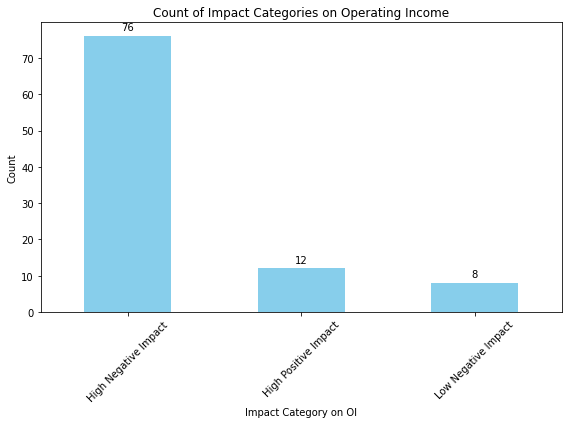

In [56]:
import matplotlib.pyplot as plt

# Grouping by 'Impact Category on OI' and counting occurrences
impact_counts = merged_data['Impact Category on OI'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
impact_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Impact Category on OI')
plt.ylabel('Count')

# Displaying counts on top of each bar
for i, count in enumerate(impact_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.title('Count of Impact Categories on Operating Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

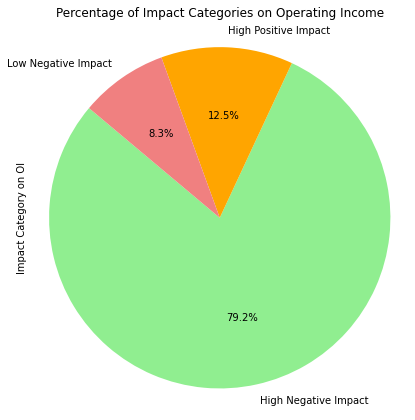

In [57]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
impact_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'orange', 'lightcoral', 'skyblue'])
plt.title('Percentage of Impact Categories on Operating Income')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()